# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [100]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [101]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [103]:
# Try loading one file

df = pd.read_parquet(r"C:\Users\win10\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\Dataset\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [104]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [105]:
# from google.colab import drive
# drive.mount('/content/drive')

In [106]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
dataset_path = r"C:\Users\win10\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\Dataset\trip_records"
os.chdir(dataset_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing: {file_name}")
        data = pd.read_parquet(file_path)
        data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
        data["pickup_date"] = data["tpep_pickup_datetime"].dt.date
        data["pickup_hour"] = data["tpep_pickup_datetime"].dt.hour
        sampled_data = pd.DataFrame()
        for date in data["pickup_date"].unique():
            for hour in range(24):
                hour_data = data[(data["pickup_date"] == date) & (data["pickup_hour"] == hour)]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing: 2023-1.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet
Processing: sampled_nyc_taxi_data.csv
Error reading file sampled_nyc_taxi_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Processing: trip_df_excl_zeros.csv
Error reading file trip_df_excl_zeros.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [107]:
# Store the df in csv/parquet
if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)
df.to_csv("sampled_nyc_taxi_data.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [108]:
# Load the new data file

tripData = pd.read_csv("sampled_nyc_taxi_data.csv")

In [109]:
# df.head()
tripData.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,3.56,1.0,N,24,141,1,...,0.5,5.50,0.00,1.0,27.50,2.5,NaN,2023-04-21,1,0.00
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.5,0.00,0.00,1.0,14.00,2.5,0.0,2023-01-10,14,NaN
2,2,2023-02-04 15:03:50,2023-02-04 15:47:48,1.0,21.09,2.0,N,132,151,1,...,0.5,10.00,6.55,1.0,89.30,0.0,NaN,2023-02-04,15,1.25
3,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,...,0.5,5.46,0.00,1.0,32.76,2.5,NaN,2023-03-24,12,0.00
4,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,0.5,3.58,0.00,1.0,21.48,2.5,NaN,2023-09-05,17,0.00
5,2,2023-11-15 08:41:24,2023-11-15 09:01:54,1.0,2.24,1.0,N,236,161,1,...,0.5,5.60,0.00,1.0,28.00,2.5,NaN,2023-11-15,8,0.00
6,2,2023-01-27 08:00:44,2023-01-27 08:18:51,2.0,2.68,1.0,N,140,74,1,...,0.5,5.42,0.00,1.0,27.12,2.5,0.0,2023-01-27,8,NaN
7,1,2023-06-01 20:15:14,2023-06-01 21:01:54,1.0,17.00,2.0,N,164,132,2,...,0.5,0.00,6.55,1.0,80.55,2.5,NaN,2023-06-01,20,0.00
8,2,2023-12-13 09:17:12,2023-12-13 09:28:09,1.0,1.51,1.0,N,162,234,1,...,0.5,3.08,0.00,1.0,18.48,2.5,NaN,2023-12-13,9,0.00
9,1,2023-04-14 15:18:15,2023-04-14 15:20:36,1.0,0.30,1.0,N,239,238,2,...,0.5,0.00,0.00,1.0,8.40,2.5,NaN,2023-04-14,15,0.00


In [110]:
# df.info()
tripData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289777 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289777 non-null  float64
 6   store_and_fwd_flag     289777 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [111]:
# Fix the index and drop any columns that are not needed

tripData = tripData.reset_index(drop=True)
print(tripData.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [112]:
# Combine the two airport fee columns
tripData['airport_fee'] = tripData['airport_fee'].fillna(tripData['Airport_fee'])

# Drop the column 'Airport_fee'
tripData = tripData.drop(columns=['Airport_fee'])
print(tripData.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [113]:
# check where values of fare amount are negative
negativeFareTrips = tripData[tripData['fare_amount'] < 0]
print(negativeFareTrips)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

[0 rows x 21 columns]


Did you notice something different in the `RatecodeID` column for above records?

In [114]:
# Analyse RatecodeID for the negative fare amounts

#No negative fare amounts for RatecodeID present in the dataset

In [115]:
# Find which columns have negative values

numCols = tripData.select_dtypes(include=['number']).columns
hasNegativeValues = tripData[numCols].lt(0).any()
negativeValueCols = hasNegativeValues[hasNegativeValues].index

print(f"Columns with negative values: {negativeValueCols}")


Columns with negative values: Index(['mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [116]:
# fix these negative values

# Counting negative values in the identified columns
negValueCounts = (tripData[negativeValueCols] < 0).sum()

print(negValueCounts)

mta_tax                  15
improvement_surcharge    16
total_amount             16
congestion_surcharge     14
airport_fee               3
dtype: int64


In [117]:
# Since the number of rows with negative values is small compared to the total dataset, we will remove them.

cleanedTripData = tripData[~(tripData[negativeValueCols] < 0).any(axis=1)]
cleanedTripData.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,3.56,1.0,N,24,141,1,...,1.0,0.5,5.50,0.00,1.0,27.50,2.5,0.00,2023-04-21,1
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.0,0.5,0.00,0.00,1.0,14.00,2.5,0.00,2023-01-10,14
2,2,2023-02-04 15:03:50,2023-02-04 15:47:48,1.0,21.09,2.0,N,132,151,1,...,0.0,0.5,10.00,6.55,1.0,89.30,0.0,1.25,2023-02-04,15
3,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,...,0.0,0.5,5.46,0.00,1.0,32.76,2.5,0.00,2023-03-24,12
4,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,2.5,0.5,3.58,0.00,1.0,21.48,2.5,0.00,2023-09-05,17


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [118]:
# Find the proportion of missing values in each column
missingValuesRatio = cleanedTripData.isna().mean()
print(missingValuesRatio)
# 'passenger_count' has missing value percentage of 3.4%, along with few other columns.

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034078
trip_distance            0.000000
RatecodeID               0.034078
store_and_fwd_flag       0.034078
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034078
airport_fee              0.034078
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [119]:
# Display the rows with null values
missingPassengerCountDF = cleanedTripData[cleanedTripData['passenger_count'].isna()]
print(missingPassengerCountDF)  

modePassengerCount = cleanedTripData['passenger_count'].mode()[0]
cleanedTripData['passenger_count'].fillna(modePassengerCount, inplace=True)
print(cleanedTripData['passenger_count'].isna().sum())


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
39             1  2023-12-12 19:05:58   2023-12-12 19:10:51              NaN   
52             2  2023-12-10 04:33:21   2023-12-10 04:37:46              NaN   
74             2  2023-02-04 00:07:05   2023-02-04 00:19:55              NaN   
89             2  2023-01-01 03:28:00   2023-01-01 03:38:00              NaN   
95             2  2023-07-12 08:55:00   2023-07-12 09:07:00              NaN   
...          ...                  ...                   ...              ...   
299887         1  2023-12-22 13:40:04   2023-12-22 14:13:42              NaN   
299888         2  2023-03-23 21:06:33   2023-03-23 21:19:04              NaN   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              NaN   
299979         1  2023-05-16 20:40:52   2023-05-16 20:45:21              NaN   
299985         2  2023-03-14 05:44:47   2023-03-14 05:51:01              NaN   

        trip_distance  RatecodeID store

Did you find zeroes in passenger_count? Handle these.

In [120]:
# Checking the number of zeroes in the 'passenger_count' column
numZeroes = (cleanedTripData['passenger_count'] == 0).sum()
print(f"Number of zeroes: {numZeroes}")

# Replaceing the zeroes with most frequent value of the passenger_count
modePassengerCount = cleanedTripData['passenger_count'].mode()[0]
cleanedTripData.loc[:, 'passenger_count'] = cleanedTripData['passenger_count'].replace(0, modePassengerCount)

# Rechecking the number of zeroes in the 'passenger_count' column
numZeroes = (cleanedTripData['passenger_count'] == 0).sum()
print(f"Number of zeroes after imputation: {numZeroes}")


Number of zeroes: 4635
Number of zeroes after imputation: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [121]:
# Fix missing values in 'RatecodeID'

missingRatecodeIdRows = cleanedTripData[cleanedTripData['RatecodeID'].isna()]  
print(missingRatecodeIdRows)  
modeRatecodeId = cleanedTripData['RatecodeID'].mode()[0]  
print(f"Mode of RatecodeID: {modeRatecodeId}")  
cleanedTripData['RatecodeID'].fillna(modeRatecodeId, inplace=True)  
print(cleanedTripData['RatecodeID'].isna().sum())  


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
39             1  2023-12-12 19:05:58   2023-12-12 19:10:51              1.0   
52             2  2023-12-10 04:33:21   2023-12-10 04:37:46              1.0   
74             2  2023-02-04 00:07:05   2023-02-04 00:19:55              1.0   
89             2  2023-01-01 03:28:00   2023-01-01 03:38:00              1.0   
95             2  2023-07-12 08:55:00   2023-07-12 09:07:00              1.0   
...          ...                  ...                   ...              ...   
299887         1  2023-12-22 13:40:04   2023-12-22 14:13:42              1.0   
299888         2  2023-03-23 21:06:33   2023-03-23 21:19:04              1.0   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              1.0   
299979         1  2023-05-16 20:40:52   2023-05-16 20:45:21              1.0   
299985         2  2023-03-14 05:44:47   2023-03-14 05:51:01              1.0   

        trip_distance  RatecodeID store


Mode of RatecodeID: 1.0
0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [122]:
# handle null values in congestion_surcharge

modeCongestionSurcharge = cleanedTripData['congestion_surcharge'].mode()[0]
print(f"Mode of congestion_surcharge: {modeCongestionSurcharge}")
cleanedTripData.loc[:, 'congestion_surcharge'] = cleanedTripData['congestion_surcharge'].fillna(modeCongestionSurcharge)
print(cleanedTripData['congestion_surcharge'].isna().sum())


Mode of congestion_surcharge: 2.5
0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [123]:
# Handle any remaining missing values

missingValuesRatio = cleanedTripData.isna().mean()
print(missingValuesRatio)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.034078
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.034078
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


In [124]:
# Handling missing values in 'store_and_fwd_flag' by replacing NaNs with the most frequent value (mode)
modeStoreAndFwdFlag = cleanedTripData['store_and_fwd_flag'].mode()[0]
print(f"Mode of store_and_fwd_flag: {modeStoreAndFwdFlag}")
cleanedTripData.loc[:, 'store_and_fwd_flag'] = cleanedTripData['store_and_fwd_flag'].fillna(modeStoreAndFwdFlag)
print(cleanedTripData['store_and_fwd_flag'].isna().sum())

missingValuesRatio = cleanedTripData.isna().mean()
print(missingValuesRatio)


Mode of store_and_fwd_flag: N
0
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.034078
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [125]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(cleanedTripData.describe())

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  299984.000000    299984.000000  299984.000000  299984.000000   
mean        1.733942         1.373140       3.727252       1.621310   
std         0.447219         0.865369      69.117655       7.320326   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.040000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000   22910.920000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299984.000000  299984.000000  299984.000000  299984.000000   
mean      165.224352     164.123703       1.164319      19.826460   
std        64.135894      69.813690       0.507187      18.360941   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

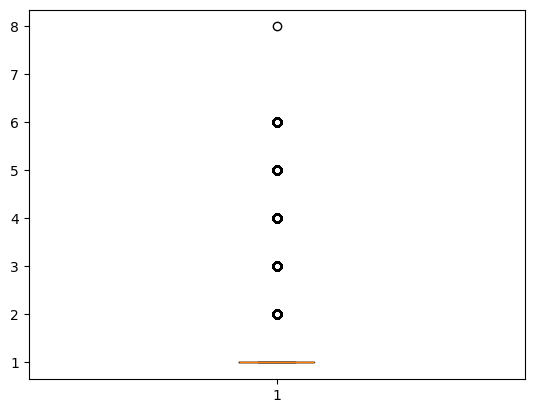

(299983, 21)

In [126]:
# remove passenger_count > 6
plt.boxplot(cleanedTripData.passenger_count)
plt.show()
cleanedTripData.passenger_count.describe()
cleanedTripData = cleanedTripData[cleanedTripData.passenger_count <= 6]
cleanedTripData.shape

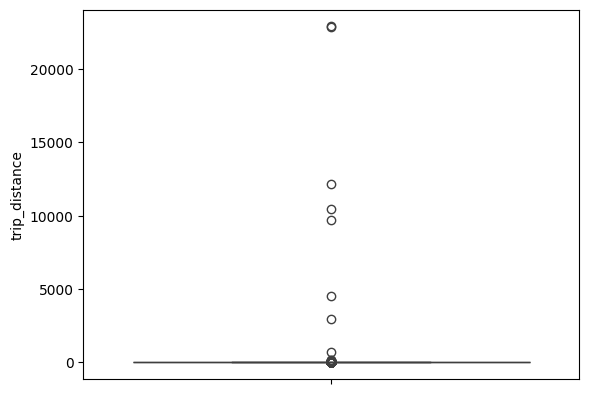

count    299983.000000
mean          3.727201
std          69.117765
min           0.000000
25%           1.040000
50%           1.790000
75%           3.400000
max       22910.920000
Name: trip_distance, dtype: float64

In [127]:
# Check for potential out of place values in 'trip_distance'
sns.boxplot(y=cleanedTripData["trip_distance"])
plt.show()
cleanedTripData.trip_distance.describe()

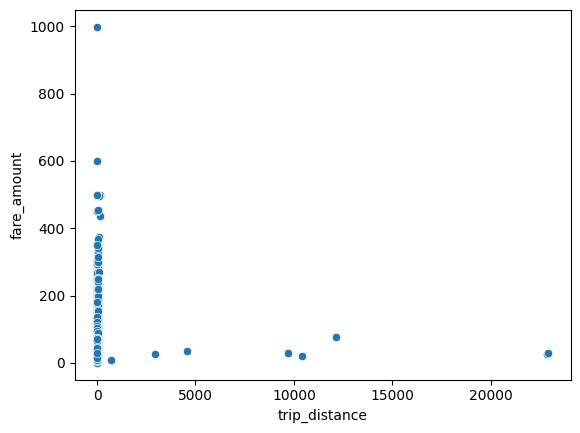

In [128]:
sns.scatterplot(x=cleanedTripData["trip_distance"], y= cleanedTripData["fare_amount"])
plt.show()



In [129]:
# Outlier removal

# Step 1: Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
outlierTripFare = cleanedTripData[
    (cleanedTripData['trip_distance'] < 5) & (cleanedTripData['fare_amount'] > 300)
]
print(f"Step 1: Count of records with outliers: {outlierTripFare.shape}")
cleanedData1 = cleanedTripData[~(
    (cleanedTripData['trip_distance'] < 5) & (cleanedTripData['fare_amount'] > 300)
)]
print(f"Step 1: Count of records after outlier removal: {cleanedData1.shape}")

# Step 2: Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
outlierZeroTrip = cleanedData1[
    (cleanedData1['trip_distance'] == 0) & 
    (cleanedData1['fare_amount'] == 0) & 
    (cleanedData1['PULocationID'] != cleanedData1['DOLocationID'])
]
print(f"Step 2: Count of records with outliers: {outlierZeroTrip.shape}")
cleanedData2 = cleanedData1[~(
    (cleanedData1['trip_distance'] == 0) & 
    (cleanedData1['fare_amount'] == 0) & 
    (cleanedData1['PULocationID'] != cleanedData1['DOLocationID'])
)]
print(f"Step 2: Count of records after outlier removal: {cleanedData2.shape}")

# Step 3: Remove entries where trip_distance > 250 (rare cases)
outlierLongTrips = cleanedData2[(cleanedData2['trip_distance'] > 250)]
print(f"Step 3: Count of records with outliers: {outlierLongTrips.shape}")
cleanedData3 = cleanedData2[~(cleanedData2['trip_distance'] > 250)]
print(f"Step 3: Count of records after outlier removal: {cleanedData3.shape}")

# Step 4: Remove entries with invalid payment_type (e.g., 0)
outlierInvalidPayment = cleanedData3[(cleanedData3['payment_type'] == 0)]
print(f"Step 4: Count of records with outliers: {outlierInvalidPayment.shape}")
cleanedData4 = cleanedData3[~(cleanedData3['payment_type'] == 0)]
print(f"Step 4: Count of records after outlier removal: {cleanedData4.shape}")


Step 1: Count of records with outliers: (9, 21)
Step 1: Count of records after outlier removal: (299974, 21)
Step 2: Count of records with outliers: (13, 21)
Step 2: Count of records after outlier removal: (299961, 21)
Step 3: Count of records with outliers: (8, 21)
Step 3: Count of records after outlier removal: (299953, 21)
Step 4: Count of records with outliers: (10216, 21)
Step 4: Count of records after outlier removal: (289737, 21)


In [130]:
#Step 5: Remove entries with invalid RatecodeID
#We see valid values of RatecodeID is 1,2,3,4,5,6. Lets check the values which is present
cleanedData4['RatecodeID'].value_counts()

# We see invalid RatecodeID 99 present. Lets remove this
df = cleanedData4[(cleanedData4['RatecodeID'] <= 6)]
print(f"Step 5:Count of records after removing above outlier: {df.shape}")

Step 5:Count of records after removing above outlier: (288058, 21)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [131]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

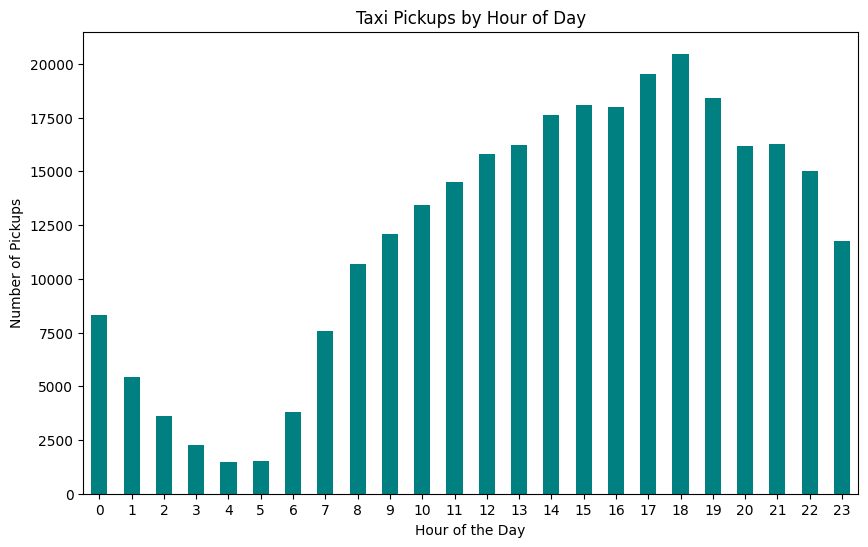

In [132]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df.loc[:, 'pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[:, 'pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df.loc[:, 'pickup_month'] = df['tpep_pickup_datetime'].dt.month
pickupCountsByHour = df.groupby('pickup_hour').size()
plt.figure(figsize=(10,6))
pickupCountsByHour.plot(kind='bar', color='#008080')
plt.title('Taxi Pickups by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()


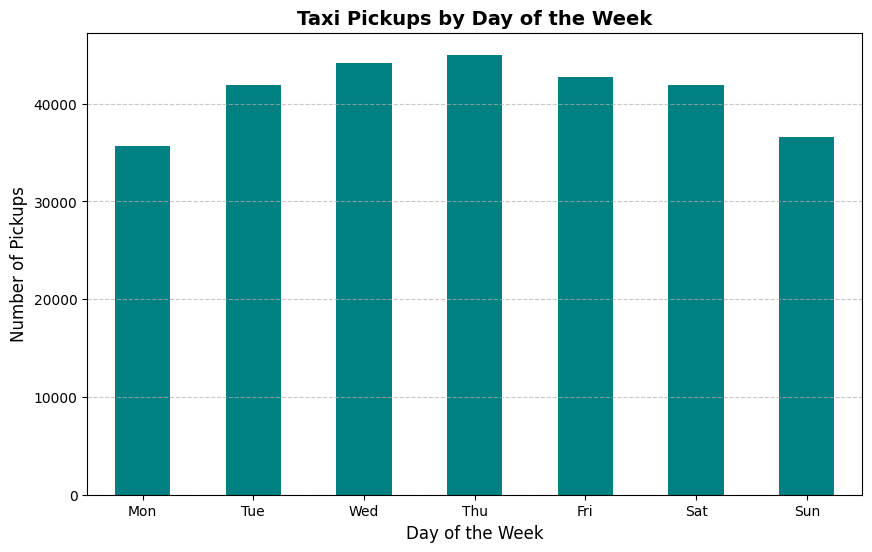

In [133]:
# Find and show the daily trends in taxi pickups (days of the week)

pickupCountsByDay = df.groupby('pickup_day_of_week').size()
plt.figure(figsize=(10,6))
pickupCountsByDay.plot(kind='bar', color='#008080')
plt.title('Taxi Pickups by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

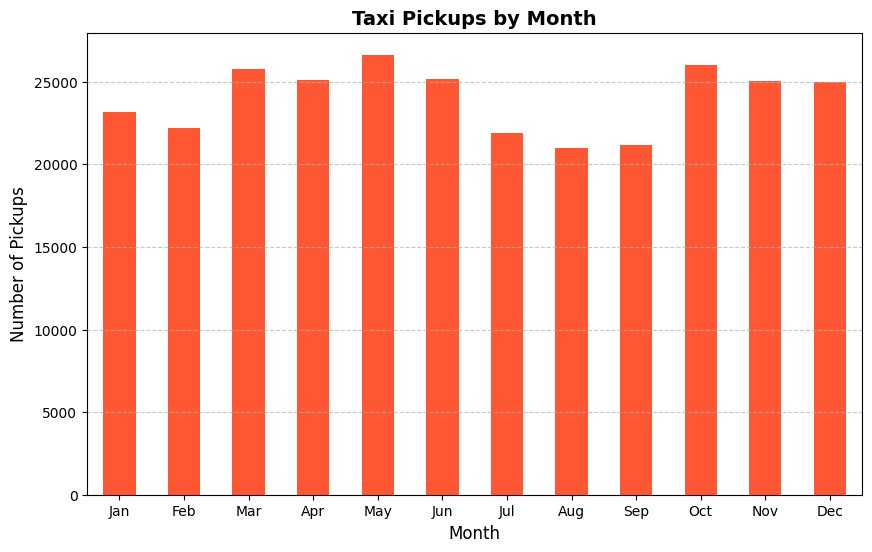

In [134]:
# Show the monthly trends in pickups

pickupCountsByMonth = df.groupby('pickup_month').size()
plt.figure(figsize=(10,6))
pickupCountsByMonth.plot(kind='bar', color='#FF5733')
plt.title('Taxi Pickups by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [135]:
# Analyse the above parameters

print("Financial parameters with zero or negative values:")
print(f"fare_amount: {df[(df['fare_amount'] <= 0)].shape[0]}")
print(f"tip_amount: {df[(df['tip_amount'] <= 0)].shape[0]}")
print(f"total_amount: {df[(df['total_amount'] <= 0)].shape[0]}")
print(f"trip_distance: {df[(df['trip_distance'] <= 0)].shape[0]}")

Financial parameters with zero or negative values:
fare_amount: 75
tip_amount: 63459
total_amount: 40
trip_distance: 3379


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [136]:
df.to_csv('sampled_nyc_taxi_data.csv', index=False)

In [137]:
# Create a df with non zero entries for the selected parameters.

tripDataExclZeros = df[ ~(df['trip_distance'] == 0) ]
tripDataExclZeros = tripDataExclZeros[ ~(tripDataExclZeros['total_amount'] == 0) ]
tripDataExclZeros = tripDataExclZeros[ ~(tripDataExclZeros['fare_amount'] == 0) ]
tripDataExclZeros = tripDataExclZeros[ ~(tripDataExclZeros['tip_amount'] == 0) ]

tripDataExclZeros.reset_index(drop=True)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,pickup_day_of_week,pickup_month
0,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,3.56,1.0,N,24,141,1,...,5.50,0.00,1.0,27.50,2.5,0.00,2023-04-21,1,4,4
1,2,2023-02-04 15:03:50,2023-02-04 15:47:48,1.0,21.09,2.0,N,132,151,1,...,10.00,6.55,1.0,89.30,0.0,1.25,2023-02-04,15,5,2
2,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,...,5.46,0.00,1.0,32.76,2.5,0.00,2023-03-24,12,4,3
3,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,3.58,0.00,1.0,21.48,2.5,0.00,2023-09-05,17,1,9
4,2,2023-11-15 08:41:24,2023-11-15 09:01:54,1.0,2.24,1.0,N,236,161,1,...,5.60,0.00,1.0,28.00,2.5,0.00,2023-11-15,8,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223341,2,2023-04-25 21:51:07,2023-04-25 22:07:37,1.0,3.34,1.0,N,255,79,1,...,4.68,0.00,1.0,28.08,2.5,0.00,2023-04-25,21,1,4
223342,1,2023-05-02 19:34:15,2023-05-02 19:40:17,1.0,1.30,1.0,N,90,246,1,...,3.00,0.00,1.0,18.10,2.5,0.00,2023-05-02,19,1,5
223343,1,2023-12-09 10:57:21,2023-12-09 11:08:29,1.0,1.70,1.0,N,236,161,1,...,3.36,0.00,1.0,20.16,2.5,0.00,2023-12-09,10,5,12
223344,2,2023-04-02 12:08:20,2023-04-02 12:20:28,1.0,1.80,1.0,N,143,141,1,...,0.88,0.00,1.0,18.38,2.5,0.00,2023-04-02,12,6,4


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [138]:
print(tripDataExclZeros.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'pickup_day_of_week', 'pickup_month'],
      dtype='object')


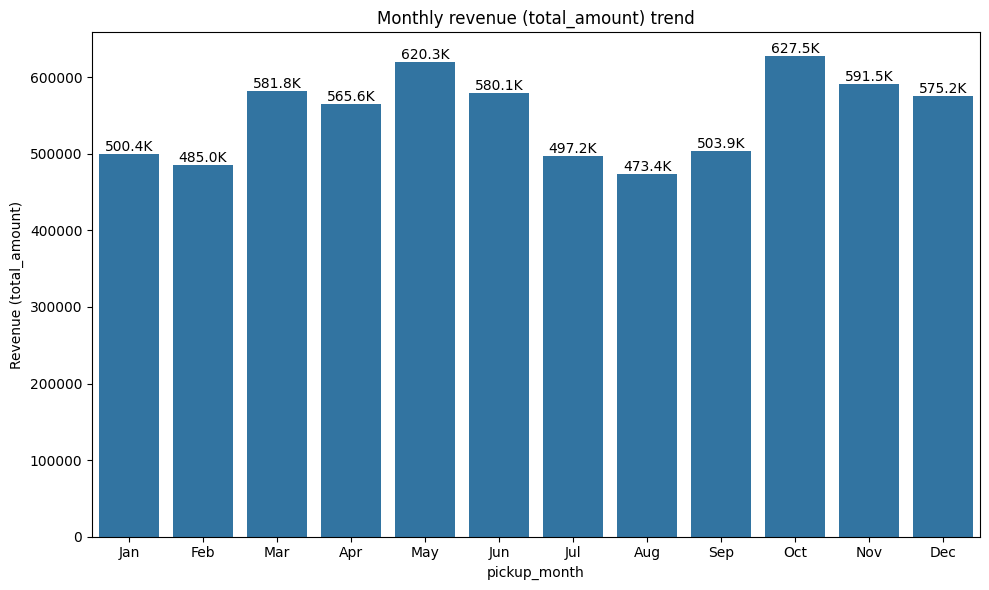

In [139]:
# Group data by month and analyse monthly revenue

monthlyRevenue = tripDataExclZeros.groupby('pickup_month')['total_amount'].sum().reset_index(name='total_amount')
monthlyRevenue

plt.figure(figsize=(10, 6))
ax =sns.barplot(data=monthlyRevenue, x='pickup_month',  y='total_amount')

for p in ax.patches:
    r = p.get_height() / 1000
    ax.annotate(
       f'{r:.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()),  ha='center', va='center',  
        fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Monthly revenue (total_amount) trend')
monthLabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=monthLabels, fontsize=10)
plt.ylabel('Revenue (total_amount)')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount  proportion
0      Q1    1567200.54    0.237389
1      Q2    1765994.77    0.267501
2      Q3    1474432.28    0.223337
3      Q4    1794206.50    0.271774


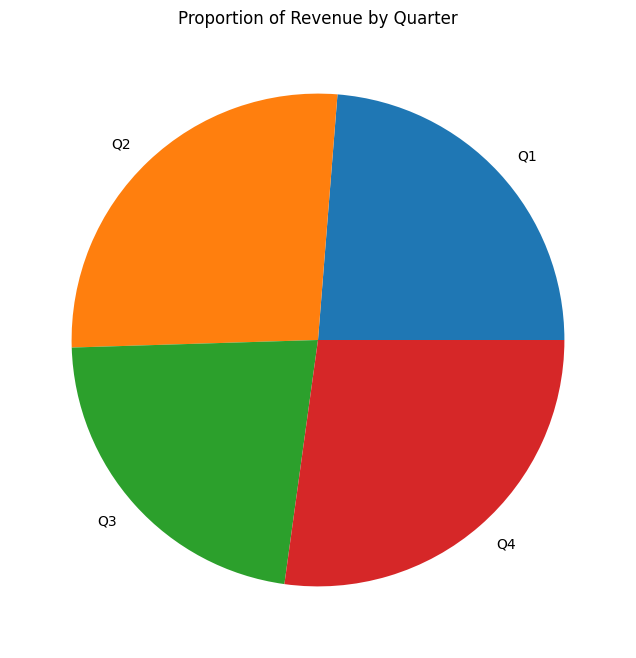

In [140]:
# Calculate proportion of each quarter

def determineQuarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'

# Add a 'quarter' column to the dataframe based on the 'month' column
tripDataExclZeros['quarter'] = tripDataExclZeros['pickup_month'].apply(determineQuarter)

# Group by 'quarter' and calculate total revenue for each quarter
quarterly_revenue = tripDataExclZeros.groupby('quarter')['total_amount'].sum().reset_index()

totalRevenue = quarterly_revenue['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / totalRevenue

# Display the proportions for each quarter
print(quarterly_revenue)

# Plotting the proportions of each quarter's revenue
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'])
plt.title('Proportion of Revenue by Quarter', fontsize=12)

# Show the plot
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

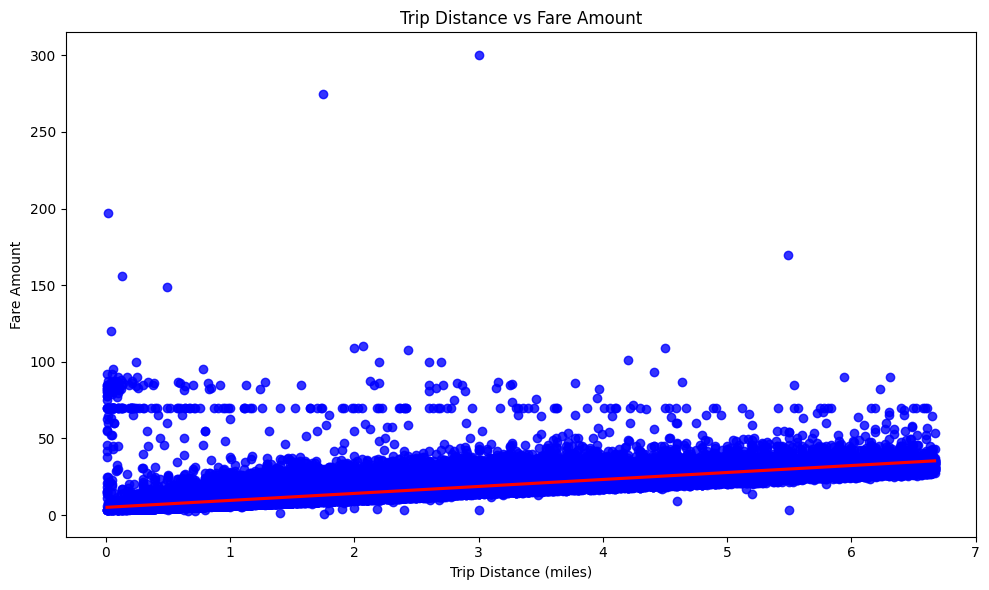

Correlation coefficient between trip_distance and fare_amount: 0.81


In [141]:
# Show how trip fare is affected by distance

#Removing outliers from trip_distance
# Calculate IQR (Interquartile Range)
Q1 = tripDataExclZeros['trip_distance'].quantile(0.25)
Q3 = tripDataExclZeros['trip_distance'].quantile(0.75)


IQR = tripDataExclZeros['trip_distance'].quantile(0.75) - tripDataExclZeros['trip_distance'].quantile(0.25)
# Define the lower and upper bounds for acceptable values
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with 'trip_distance' outside of these bounds
cleanedData = tripDataExclZeros[(tripDataExclZeros['trip_distance'] >= lowerBound) & (tripDataExclZeros['trip_distance'] <= upperBound)]

#Both trip distance and fare_amount is numerical values. So, we will use a scatter plot with regression line
plt.figure(figsize=(10, 6))

sns.regplot(data=cleanedData, x='trip_distance', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


plt.title('Trip Distance vs Fare Amount', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Fare Amount', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Correlation
correlation = cleanedData['trip_distance'].corr(df['fare_amount'])
print(f'Correlation coefficient between trip_distance and fare_amount: {correlation:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

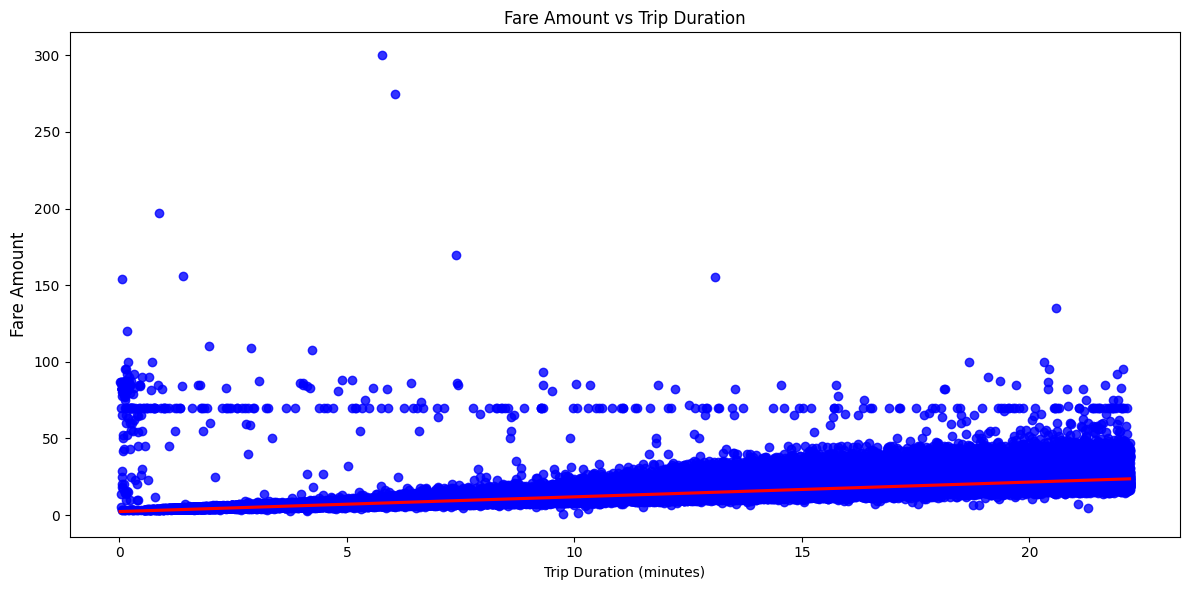

Correlation coefficient between fare_amount and trip_duration: 0.74


In [142]:
# Show relationship between fare and trip duration

#Calculate the trip_duration
tripDataExclZeros['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
tripDataExclZeros['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
tripDataExclZeros['trip_duration'] = (tripDataExclZeros['tpep_dropoff_datetime'] - tripDataExclZeros['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

#Filter rows with negative trip duration and zero
tripDataExclZeros = tripDataExclZeros[~(tripDataExclZeros['trip_duration'] <= 0)]

#Removing outliers from trip_duration
# Calculate IQR (Interquartile Range)
IQR = tripDataExclZeros['trip_duration'].quantile(0.75) - tripDataExclZeros['trip_duration'].quantile(0.25)
# Define the lower and upper bounds for acceptable values
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with 'trip_duration' outside of these bounds
cleanedData = tripDataExclZeros[(tripDataExclZeros['trip_duration'] >= lowerBound) & (tripDataExclZeros['trip_duration'] <= upperBound)]

#Visualize and calculate the correlation between fare_amount and trip_duration
plt.figure(figsize=(12, 6))
sns.regplot(data=cleanedData, x='trip_duration', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Fare Amount vs Trip Duration', fontsize=12)
plt.xlabel('Trip Duration (minutes)', fontsize=10)
plt.ylabel('Fare Amount', fontsize=12)
plt.tight_layout()
plt.show()

#Correlation
correlationFareDuration = cleanedData['fare_amount'].corr(cleanedData['trip_duration'])
print(f'Correlation coefficient between fare_amount and trip_duration: {correlationFareDuration:.2f}')


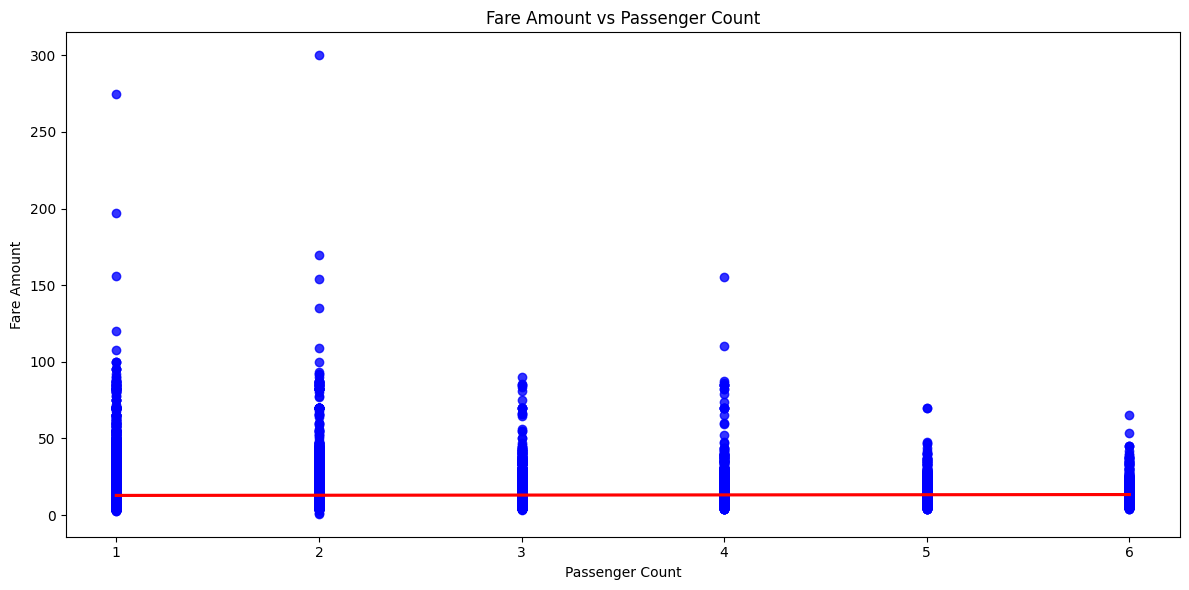

Correlation coefficient between fare_amount and passenger_count: 0.01


In [143]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(12, 6))
# Plot scatter plot with regression line
sns.regplot(data=cleanedData, x='passenger_count', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Fare Amount vs Passenger Count', fontsize=12)
plt.xlabel('Passenger Count', fontsize=10)
plt.ylabel('Fare Amount', fontsize=10)
plt.tight_layout()
plt.show()

correlationFarePassenger = cleanedData['fare_amount'].corr(cleanedData['passenger_count'])
print(f'Correlation coefficient between fare_amount and passenger_count: {correlationFarePassenger:.2f}')


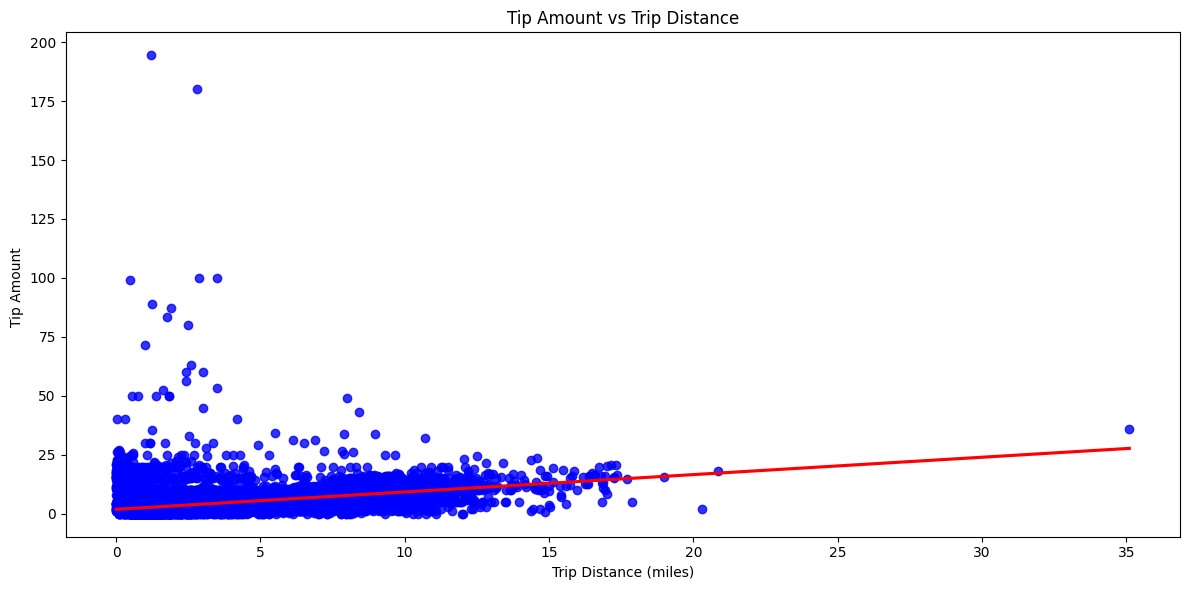

Correlation coefficient between Tip Amount and Trip Distance: 0.56


In [144]:
# Show relationship between tip and trip distance

plt.figure(figsize=(12, 6))
# Plot scatter plot with regression line
sns.regplot(data=cleanedData, x='trip_distance', y='tip_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Tip Amount vs Trip Distance', fontsize=12)
plt.xlabel('Trip Distance (miles)', fontsize=10)
plt.ylabel('Tip Amount ', fontsize=10)
plt.tight_layout()
plt.show()

# Correlation coefficient for tip_amount and trip_distance
correlationTipDistance = cleanedData['tip_amount'].corr(cleanedData['trip_distance'])
print(f'Correlation coefficient between Tip Amount and Trip Distance: {correlationTipDistance:.2f}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type_labelled
Credit Card    175961
Cash                2
No Charge           2
Dispute             1
Name: count, dtype: int64


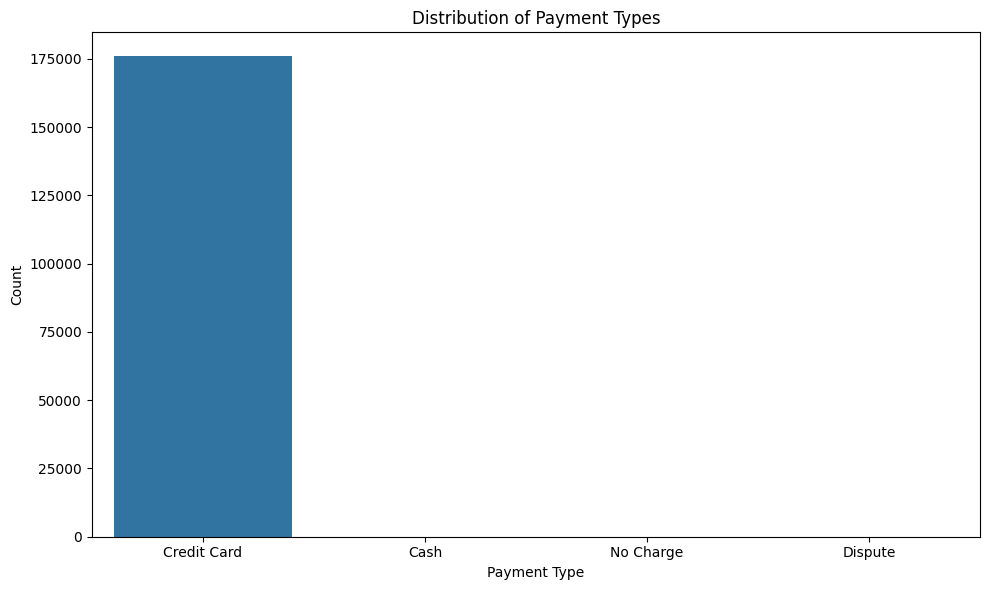

In [145]:
# Analyse the distribution of different payment types (payment_type).

paymentTypeMapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Map the numeric values to labels
cleanedData['payment_type_labelled'] =cleanedData['payment_type'].map(paymentTypeMapping)

# Count the occurrences of each payment type (using the labeled column)
paymentTypeCounts = cleanedData['payment_type_labelled'].value_counts()

# Print the payment type counts
print(paymentTypeCounts)

# Plot the distribution of payment types using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=paymentTypeCounts.index, y=paymentTypeCounts.values)

# Add title and labels
plt.title('Distribution of Payment Types', fontsize=12)
plt.xlabel('Payment Type', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [146]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [147]:
# import geopandas as gpd

import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\win10\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi (1)\Starter Notebook - EDA NYC Taxi\Dataset\taxi_zones\taxi_zones.shp")
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

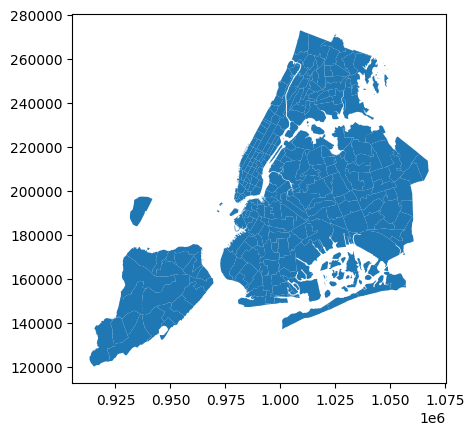

In [148]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [149]:
# Merge zones and trip records using locationID and PULocationID
mergedData = pd.merge(cleanedData, zones , left_on='PULocationID', right_on='LocationID', how='inner')

# View the result of the join
mergedData.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,quarter,trip_duration,payment_type_labelled,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-04-21 01:37:42,2023-04-21 01:49:45,1.0,3.56,1.0,N,24,141,1,...,Q2,12.050000,Credit Card,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.114 230274.267, 995312.583 23..."
1,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,Q3,9.266667,Credit Card,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-11-15 08:41:24,2023-11-15 09:01:54,1.0,2.24,1.0,N,236,161,1,...,Q4,20.500000,Credit Card,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220..."
3,2,2023-01-27 08:00:44,2023-01-27 08:18:51,2.0,2.68,1.0,N,140,74,1,...,Q1,18.116667,Credit Card,140,0.047584,0.000114,Lenox Hill East,140,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
4,2,2023-12-13 09:17:12,2023-12-13 09:28:09,1.0,1.51,1.0,N,162,234,1,...,Q4,10.950000,Credit Card,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [150]:
# Group data by location and calculate the number of trips

tripCount = mergedData.groupby('LocationID').size().reset_index(name='total_num_trips')

# View the result
tripCount

,LocationID,total_num_trips
0,1,4
1,4,211
2,6,1
3,7,41
4,12,36
...,...,...
142,257,1
143,260,7
144,261,733
145,262,2742


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [151]:
# Merge trip counts back to the zones GeoDataFrame

mergedTripCountData = pd.merge(zones, tripCount, how='left', on='LocationID')

# View the result
mergedTripCountData


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",4.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",211.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",NaN
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",7.0
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",733.0
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",2742.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

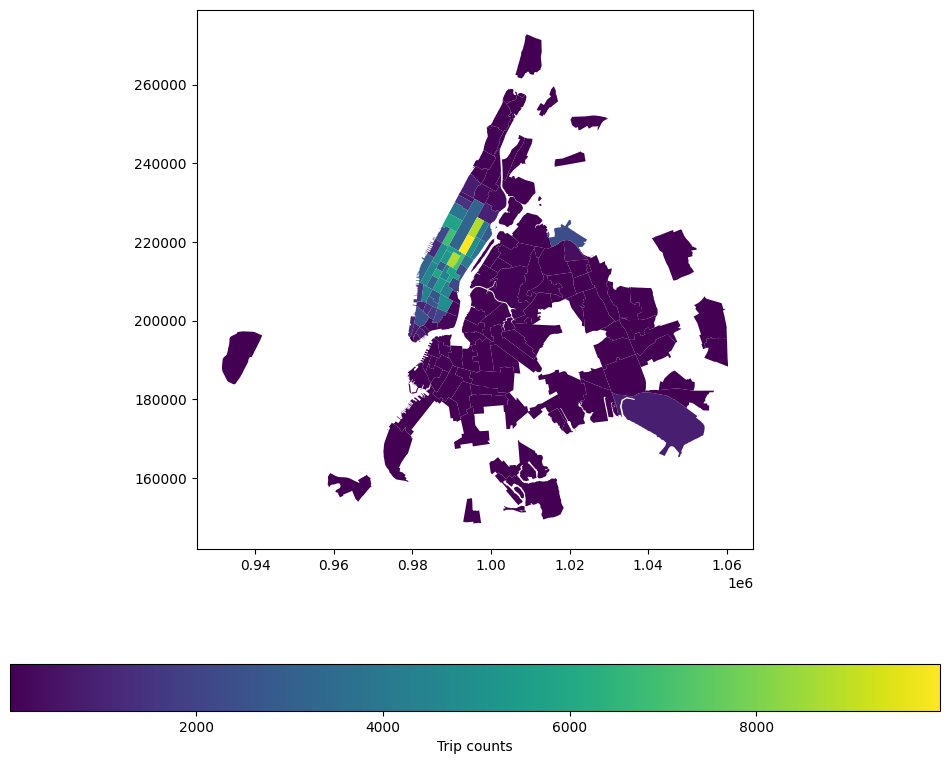

In [152]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
mergedTripCountData.plot(column = 'total_num_trips', ax = ax, legend = True, legend_kwds = {'label': "Trip counts", 'orientation': "horizontal"})

plt.show()


In [153]:
# can you try displaying the zones DF sorted by the number of trips?
sortedZones = mergedTripCountData.sort_values(by='total_num_trips', ascending=False)
sortedZones


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_num_trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",9971.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",8816.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",8784.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",7066.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",6895.0
...,...,...,...,...,...,...,...,...
251,252,0.158004,0.001025,Whitestone,252,Queens,"POLYGON ((1033946.683 231157.996, 1033973.166 ...",NaN
252,253,0.036051,0.000078,Willets Point,253,Queens,"POLYGON ((1028825.348 218121.42, 1029152.461 2...",NaN
253,254,0.085886,0.000360,Williamsbridge/Olinville,254,Bronx,"POLYGON ((1025214.477 259577.301, 1025348.099 ...",NaN
257,258,0.089013,0.000366,Woodhaven,258,Queens,"POLYGON ((1027223.758 190451.926, 1027233.961 ...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

In [154]:
print(mergedTripCountData.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   total_num_trips  
0              4.0  
1              NaN  
2              NaN  
3            211.0  
4          

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [155]:
# Find routes which have the slowest speeds at different times of the day
mergedData['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
mergedData['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

#Extract the hour of the day from pickup_datetime
mergedData['hour'] = mergedData['tpep_pickup_datetime'].dt.hour

# Calculate trip duration (in minutes or seconds)
mergedData['trip_duration'] = (mergedData['tpep_dropoff_datetime'] - mergedData['tpep_pickup_datetime']).dt.total_seconds() / 60  # in minutes

# Group by hour, route (PULocationID, DOLocationID), and calculate average trip distance and duration
groupedData = mergedData.groupby(['hour', 'PULocationID', 'DOLocationID']).agg(
    avg_trip_duration=('trip_duration', 'mean'),
    avg_trip_distance=('trip_distance', 'mean')
).reset_index()

# Calculate speed (distance / duration)
groupedData['speed'] = groupedData['avg_trip_distance'] / groupedData['avg_trip_duration']

# Sort by hour and speed to find slowest routes for each hour
slowest_routes = groupedData.sort_values(by=['hour', 'speed'], ascending=[True, True])

#  Display slowest routes for each hour of the day 
top_slowest_routes = slowest_routes.groupby('hour').head(5)  # Top 5 slowest routes for each hour

# Display the result
top_slowest_routes[['hour', 'PULocationID', 'DOLocationID', 'speed']]

,hour,PULocationID,DOLocationID,speed
935,0.0,162,230,0.002608
569,0.0,138,138,0.003061
355,0.0,100,264,0.004762
931,0.0,162,186,0.007578
156,0.0,68,87,0.008680
...,...,...,...,...
41692,23.0,243,243,0.001497
40354,23.0,87,87,0.004253
40163,23.0,48,113,0.005169
40930,23.0,151,236,0.005530


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

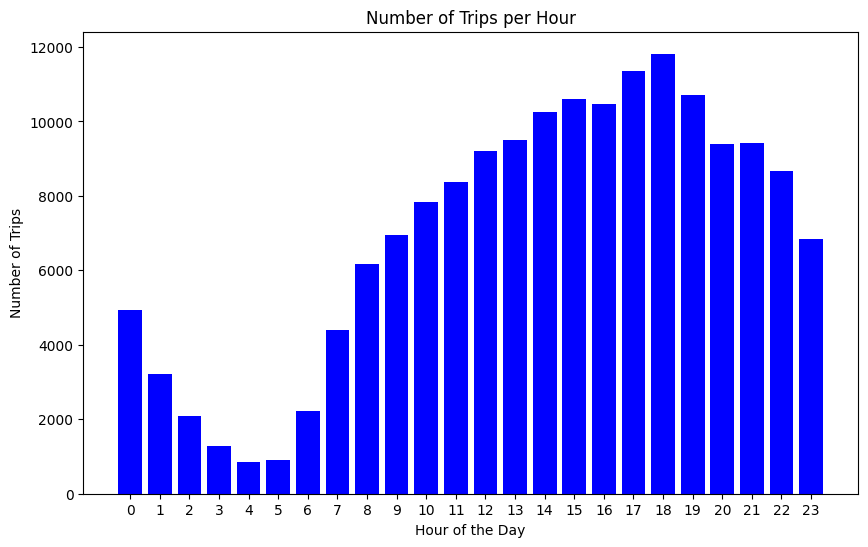

The busiest hour is 18.0 with 11819.0 trips.


In [156]:
# Visualise the number of trips per hour and find the busiest hour
tripsPerHour = mergedData.groupby('hour').size().reset_index(name='num_trips')

# Visualize the number of trips per hour with a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tripsPerHour['hour'], tripsPerHour['num_trips'], color='blue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # x-axis ticks for each hour
plt.show()

# Find the busiest hour
busyHour = tripsPerHour.loc[tripsPerHour['num_trips'].idxmax()]
print(f"The busiest hour is {busyHour['hour']} with {busyHour['num_trips']} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

The five busiest hours with actual trip counts are:
    hour  actual_num_trips
18  18.0          236380.0
17  17.0          227140.0
19  19.0          214120.0
15  15.0          212120.0
16  16.0          209580.0


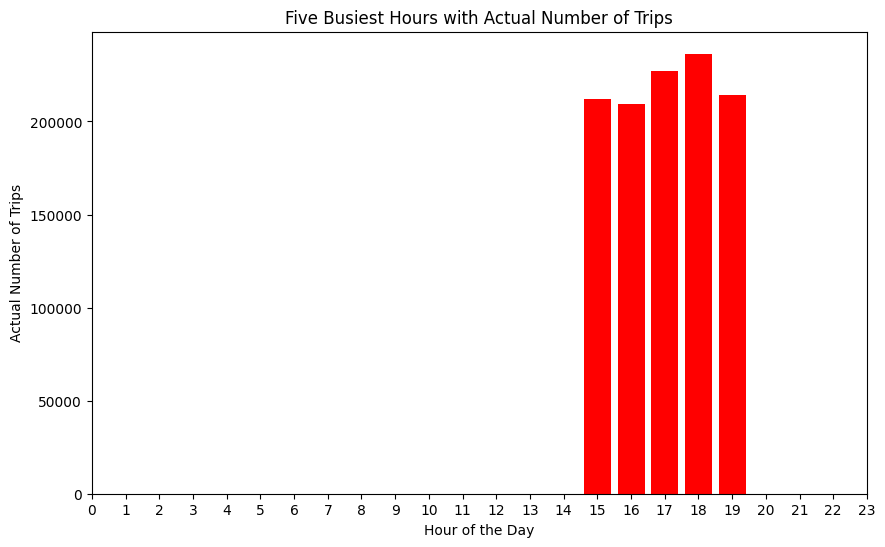

In [157]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
samplingRatio = 0.05  # actual sampling ratio used

# Scale the number of trips up by the sampling ratio
tripsPerHour['actual_num_trips'] = tripsPerHour['num_trips'] / samplingRatio

# Sort by actual number of trips in descending order
busiestHours = tripsPerHour.sort_values(by='actual_num_trips', ascending=False).head(5)

#  Display the busiest hours and their actual trip counts
print("The five busiest hours with actual trip counts are:")
print(busiestHours[['hour', 'actual_num_trips']])

# Visualize the actual number of trips in the busiest hours
plt.figure(figsize=(10, 6))
plt.bar(busiestHours['hour'], busiestHours['actual_num_trips'], color='red')
plt.title('Five Busiest Hours with Actual Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Number of Trips')
plt.xticks(range(24))  # x-axis  ticks for each hour
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 1200x600 with 0 Axes>

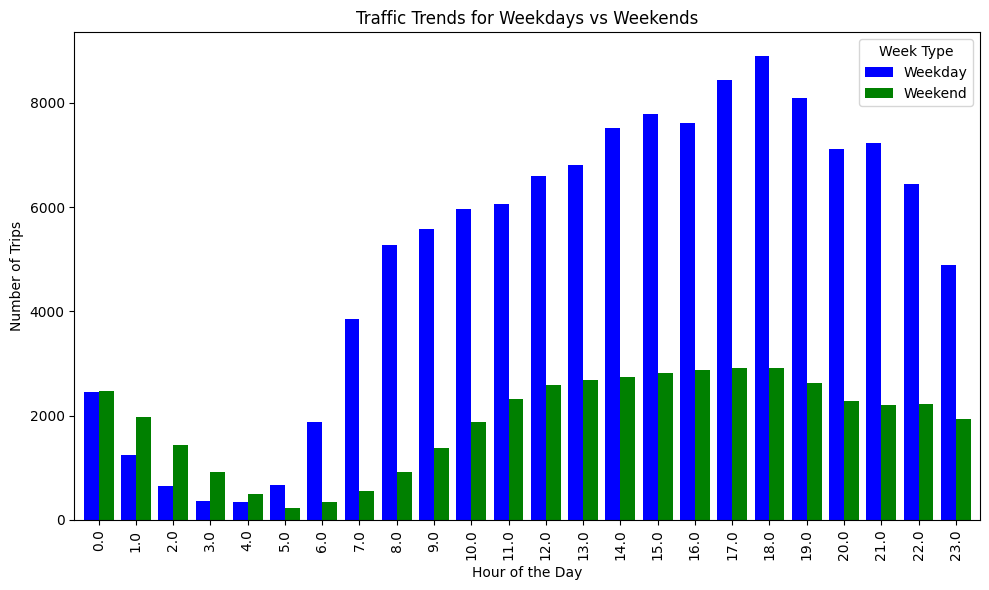

In [158]:
# Compare traffic trends for the week days and weekends

mergedData['day_of_week'] = mergedData['tpep_pickup_datetime'].dt.weekday

#  Categorize into weekdays (0-4) and weekends (5-6)
mergedData['week_type'] = mergedData['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by 'week_type' and hour to get the number of trips
tripsByWeektype = mergedData.groupby(['week_type', 'hour']).size().reset_index(name='num_trips_week_type')

# pivot the data to make weekdays and weekends side-by-side
trips_pivot = tripsByWeektype.pivot(index='hour', columns='week_type', values='num_trips_week_type')

# Plot the traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
trips_pivot.plot(kind='bar', width=0.8, figsize=(10,6), color=['blue', 'green'])
plt.title('Traffic Trends for Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # x-axis  ticks for each hour
plt.legend(title='Week Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

      hour  PULocationID  num_pickups
65     0.0           237          281
64     0.0           236          261
44     0.0           161          242
36     0.0           142          215
45     0.0           162          213
...    ...           ...          ...
1868  23.0           239          252
1849  23.0           170          240
1852  23.0           186          238
1860  23.0           230          225
1864  23.0           234          217

[240 rows x 3 columns]
      hour  DOLocationID  num_dropoffs
102    0.0           237           272
101    0.0           236           242
72     0.0           161           209
63     0.0           141           172
64     0.0           142           172
...    ...           ...           ...
2873  23.0           162           222
2909  23.0           239           221
2861  23.0           142           213
2832  23.0            68           195
2905  23.0           234           192

[240 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

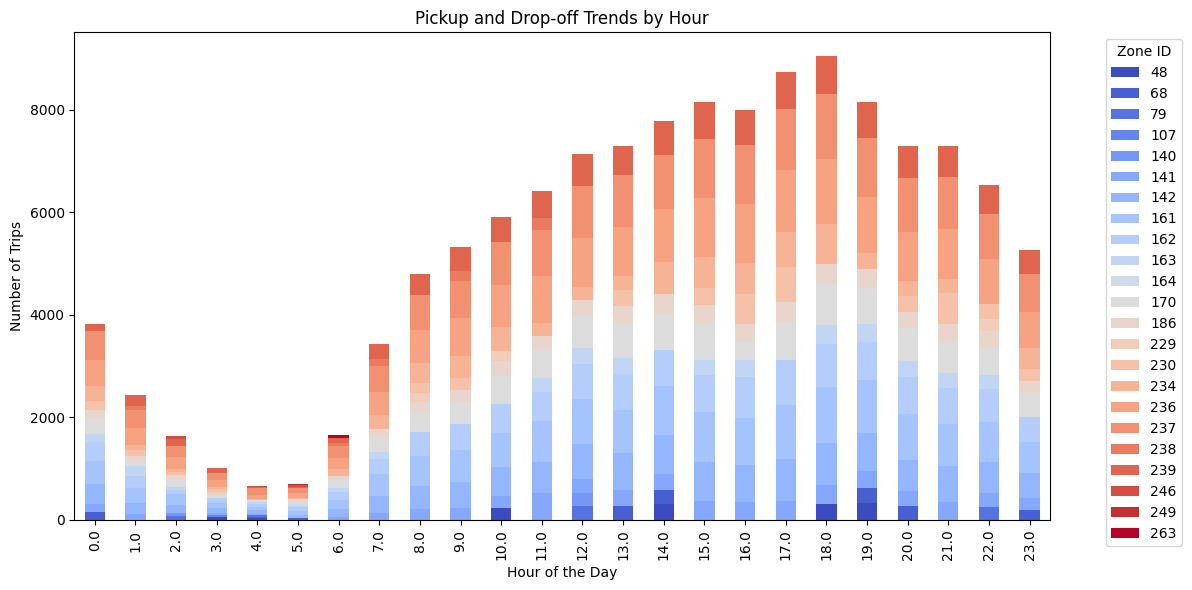

In [159]:
# Find top 10 pickup and dropoff zones

pickupCounts = mergedData.groupby(['hour', 'PULocationID']).size().reset_index(name='num_pickups')
dropoffCounts = mergedData.groupby(['hour', 'DOLocationID']).size().reset_index(name='num_dropoffs')

# Sort by number of pickups in descending order within each hour
pickupCountSorted = pickupCounts.sort_values(by=['hour', 'num_pickups'], ascending=[True, False])
dropoffCountsSorted = dropoffCounts.sort_values(by=['hour', 'num_dropoffs'], ascending=[True, False])

# Select the top 10 zones for each hour
topTenZonesPerHour = pickupCountSorted.groupby('hour').head(10)
topTenDropoffZonesPerHour = dropoffCountsSorted.groupby('hour').head(10)

# Display the top 10 zones with high hourly pickups
print(topTenZonesPerHour[['hour', 'PULocationID', 'num_pickups']])

#Display the top 10 drop-off zones with high hourly drop-offs
print(topTenDropoffZonesPerHour[['hour', 'DOLocationID', 'num_dropoffs']])

pickupPivot = topTenZonesPerHour.pivot(index='hour', columns='PULocationID', values='num_pickups').fillna(0)
dropoffPivot = topTenDropoffZonesPerHour.pivot(index='hour', columns='DOLocationID', values='num_dropoffs').fillna(0)

# Merge both pickup and dropoff data for easy comparison
combinedData = pickupPivot.add(dropoffPivot, fill_value=0)

#  Plot the pickup and drop-off trends for each hour
plt.figure(figsize=(12, 6))
combinedData.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title('Pickup and Drop-off Trends by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Ensure x-axis has ticks for each hour
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [160]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickupCounts = mergedData.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoffCounts = mergedData.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts on the location IDs
pickupDropoffCounts = pd.merge(pickupCounts, dropoffCounts, 
                                  left_on='PULocationID', right_on='DOLocationID', 
                                  how='outer')  # 'outer' join to keep all zones even if only one of the counts exists

# Fill missing values with 0 (in case there were locations with only pickups or dropoffs)
pickupDropoffCounts.fillna(0, inplace=True)

# Calculate the pickup to dropoff ratio
pickupDropoffCounts['pickup_dropoff_ratio'] = pickupDropoffCounts['pickup_count'] / pickupDropoffCounts['dropoff_count']

# Sort by the ratio
pickupDropoffCountsSorted = pickupDropoffCounts.sort_values(by='pickup_dropoff_ratio', ascending=False)

# Display the 10 highest and 10 lowest ratios
highestRatios = pickupDropoffCountsSorted.head(10)
lowestRatios = pickupDropoffCountsSorted.tail(10)

# Show the results
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(highestRatios[['PULocationID', 'pickup_dropoff_ratio']])

print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
print(lowestRatios[['PULocationID', 'pickup_dropoff_ratio']])

Top 10 Highest Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
170         207.0                   inf
2             6.0                   inf
14           18.0                   inf
56           70.0              8.333333
104         132.0              5.826389
110         138.0              3.201657
153         186.0              1.526302
89          114.0              1.406479
35           43.0              1.392888
81          100.0              1.303318

Top 10 Lowest Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
103           0.0                   0.0
98            0.0                   0.0
95            0.0                   0.0
92            0.0                   0.0
91            0.0                   0.0
86            0.0                   0.0
83            0.0                   0.0
82            0.0                   0.0
80            0.0                   0.0
221           0.0                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [161]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

mergedData['pickup_hour'] = mergedData['tpep_pickup_datetime'].dt.hour
mergedData['dropoff_hour'] = mergedData['tpep_dropoff_datetime'].dt.hour

# Filter for trips occurring between 11 PM (23:00) and 5 AM (05:00)
nightTrips = mergedData[(mergedData['pickup_hour'] >= 23) | (mergedData['pickup_hour'] <= 5) | 
                 (mergedData['dropoff_hour'] >= 23) | (mergedData['dropoff_hour'] <= 5)]

# Group by 'PULocationID' (pickup location) and 'DOLocationID' (dropoff location)
pickupCounts_night = nightTrips.groupby('PULocationID').size().reset_index(name='night_pickups')
dropoffCounts_night = nightTrips.groupby('DOLocationID').size().reset_index(name='night_dropoffs')

# Merge pickup and dropoff counts on location IDs
nightCounts = pd.merge(pickupCounts_night, dropoffCounts_night, 
                        left_on='PULocationID', right_on='DOLocationID', 
                        how='outer')

# Fill missing values with 0 (in case there were locations with only pickups or dropoffs during the night)
nightCounts.fillna(0, inplace=True)

# Sort by night pickups and dropoffs
nightCountsSorted = nightCounts.sort_values(by=['night_pickups', 'night_dropoffs'], ascending=False)

# Display the zones with highest traffic during night hours
topNightPickupDropoffZones = nightCountsSorted[['PULocationID', 'night_pickups', 'night_dropoffs']].head(10)

# Show the result
print("Top 10 Zones with High Pickup and Dropoff Traffic During Night Hours:")
print(topNightPickupDropoffZones)


Top 10 Zones with High Pickup and Dropoff Traffic During Night Hours:
     PULocationID  night_pickups  night_dropoffs
143         237.0         1298.0          1094.0
142         236.0         1082.0          1182.0
96          161.0         1082.0           916.0
84          142.0          917.0           735.0
97          162.0          894.0           683.0
145         239.0          745.0           684.0
110         186.0          730.0           500.0
103         170.0          713.0           742.0
137         230.0          708.0           559.0
141         234.0          695.0           605.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [162]:
# Filter for night hours (11 PM to 5 AM)

mergedData['is_night'] = mergedData['pickup_hour'].apply(lambda x: 23 <= x or x <= 5)

# Calculate total revenue (fare_amount)
mergedData['total_revenue'] = mergedData['total_amount']

# Calculate total revenue during nighttime
nighttimeRevenue = mergedData[mergedData['is_night']]['total_revenue'].sum()

# Calculate total revenue during daytime (everything else)
daytimeRevenue = mergedData[~mergedData['is_night']]['total_revenue'].sum()

# Calculate the total revenue for the entire dataset
totalRevenue = mergedData['total_revenue'].sum()

# Calculate the revenue share for nighttime and daytime
nighttimeRevenue_share = nighttimeRevenue / totalRevenue * 100
daytimeRevenue_share = daytimeRevenue / totalRevenue * 100

# Print the results
print(f"Total Revenue: ${totalRevenue:.2f}")
print(f"Nighttime Revenue: ${nighttimeRevenue:.2f}")
print(f"Daytime Revenue: ${daytimeRevenue:.2f}")
print(f"Nighttime Revenue Share: {nighttimeRevenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytimeRevenue_share:.2f}%")


Total Revenue: $3683243.17
Nighttime Revenue: $423618.91
Daytime Revenue: $3259624.26
Nighttime Revenue Share: 11.50%
Daytime Revenue Share: 88.50%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [163]:
# Analyse the fare per mile per passenger for different passenger counts

mergedData = mergedData[mergedData['trip_distance'] > 0]

# Calculate the fare per mile for each trip
mergedData['fare_per_mile'] = mergedData['fare_amount'] / mergedData['trip_distance']

# Calculate fare per mile per passenger
mergedData['fare_per_mile_per_passenger'] = mergedData['fare_per_mile'] / mergedData['passenger_count']

# Group by 'passenger_count' and calculate the average fare per mile per passenger
averageFarePerPassenger = mergedData.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort the results to see the fare per mile per passenger for each passenger count
averageFarePerPassenger_sorted = averageFarePerPassenger.sort_values(by='fare_per_mile_per_passenger', ascending=True)

# Display the results
print(averageFarePerPassenger_sorted)



   passenger_count  fare_per_mile_per_passenger
5              6.0                     1.331712
4              5.0                     1.592339
3              4.0                     3.863239
2              3.0                     3.921555
1              2.0                     5.423934
0              1.0                     9.363678


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [164]:
# Compare the average fare per mile for different days and for different times of the day

mergedData['hour_of_day'] = mergedData['tpep_pickup_datetime'].dt.hour
mergedData['day_of_week'] = mergedData['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate fare per mile
mergedData['fare_per_mile'] = mergedData['fare_amount'] / mergedData['trip_distance']

# Group by hour of the day and calculate the average fare per mile
avgFarePerMileByHour = mergedData.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# Group by day of the week and calculate the average fare per mile
avgFarePerMileByDay =mergedData.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Map the day of the week to a string 
avgFarePerMileByDay['day_of_week'] = avgFarePerMileByDay['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Display the results
print("Average Fare per Mile by Hour of the Day:")
print(avgFarePerMileByHour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avgFarePerMileByDay)


Average Fare per Mile by Hour of the Day:
    hour_of_day  fare_per_mile
0           0.0      11.519234
1           1.0      11.054465
2           2.0       8.426203
3           3.0       8.024436
4           4.0       9.996906
5           5.0      10.397907
6           6.0       8.611134
7           7.0       9.987956
8           8.0       8.557381
9           9.0      10.152249
10         10.0       9.876576
11         11.0      10.221238
12         12.0       9.444636
13         13.0       9.517814
14         14.0       8.219173
15         15.0       9.854612
16         16.0       9.970166
17         17.0       8.722762
18         18.0       9.927655
19         19.0       9.746817
20         20.0       8.802850
21         21.0       9.608528
22         22.0      11.723242
23         23.0      12.320495

Average Fare per Mile by Day of the Week:
  day_of_week  fare_per_mile
0      Monday       9.499241
1     Tuesday      10.070396
2   Wednesday      10.117805
3    Thursday       9.59

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

hour_of_day       0.0        1.0       2.0       3.0        4.0        5.0   \
VendorID                                                                      
1             8.171134   8.289133  8.248607  8.199699   8.296458   8.017604   
2            12.690014  11.988543  8.489812  7.962055  10.566421  11.209052   

hour_of_day      6.0        7.0       8.0        9.0   ...      14.0  \
VendorID                                               ...             
1            8.282768   7.936619  8.233430   8.365483  ...  8.293392   
2            8.727181  10.703188  8.666954  10.796645  ...  8.192893   

hour_of_day       15.0       16.0      17.0       18.0       19.0      20.0  \
VendorID                                                                      
1             8.219226   8.272763  8.204132   8.203471   8.309879  8.238767   
2            10.413117  10.577088  8.904832  10.544977  10.251550  8.995635   

hour_of_day      21.0       22.0       23.0  
VendorID                       

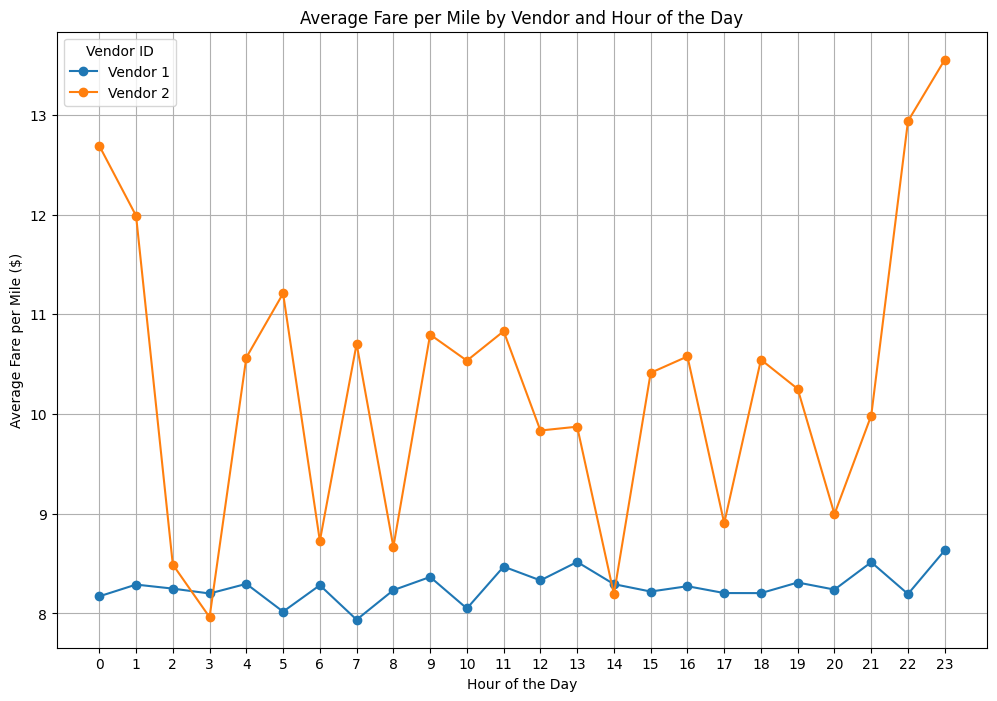

In [165]:
# Compare fare per mile for different vendors

df['fare_per_mile'] = mergedData['fare_amount'] / df['trip_distance']

# Group by 'vendor_id' and 'hour_of_day' to calculate the average fare per mile
avgFarePerMileByVendorHour = mergedData.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Pivot the table for better visualization (vendor_id on rows, hour_of_day on columns)
pivot_table = avgFarePerMileByVendorHour.pivot(index='VendorID', columns='hour_of_day', values='fare_per_mile')

# Display the results
print(pivot_table)

# Plot the results for each vendor

plt.figure(figsize=(12, 8))
for vendor_id in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[vendor_id], marker='o', label=f"Vendor {vendor_id}")

plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


distance_category  Up to 2 miles  2 to 5 miles  More than 5 miles
VendorID                                                         
1                       9.290935      5.972130           4.309976
2                      12.318780      6.153714           4.361842


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<Figure size 1200x800 with 0 Axes>

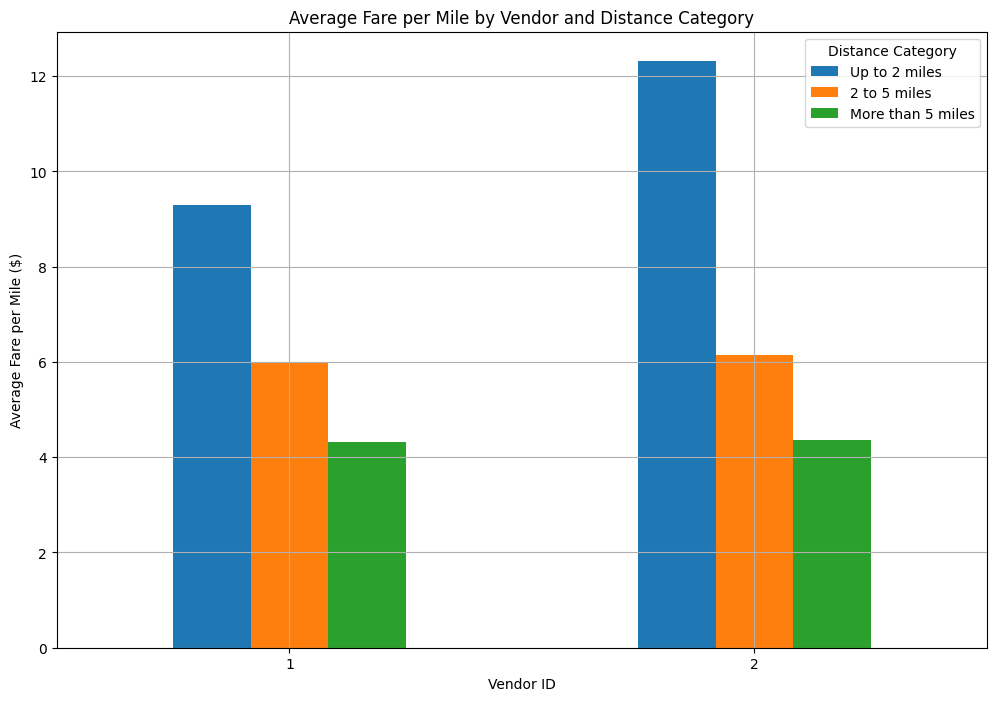

In [166]:
# Defining distance tiers

conditions = [
    (mergedData['trip_distance'] <= 2),         # Up to 2 miles
    (mergedData['trip_distance'] > 2) & (mergedData['trip_distance'] <= 5),  # Between 2 and 5 miles
    (mergedData['trip_distance'] > 5)           # More than 5 miles
]

# Assign labels for each category
labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column for distance category
mergedData['distance_category'] = pd.cut(mergedData['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels, right=True)

# Group by 'vendor_id' and 'distance_category' and calculate the average fare per mile
avgFarePerMileByVendorDistance = mergedData.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()

# Pivot the table for better comparison (vendor_id on rows, distance_category on columns)
pivot_table = avgFarePerMileByVendorDistance.pivot(index='VendorID', columns='distance_category', values='fare_per_mile')

# Display the pivot table
print(pivot_table)

# Plot the results for each vendor
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Average Fare per Mile by Vendor and Distance Category')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Distance Category')
plt.grid(True)
plt.tight_layout

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

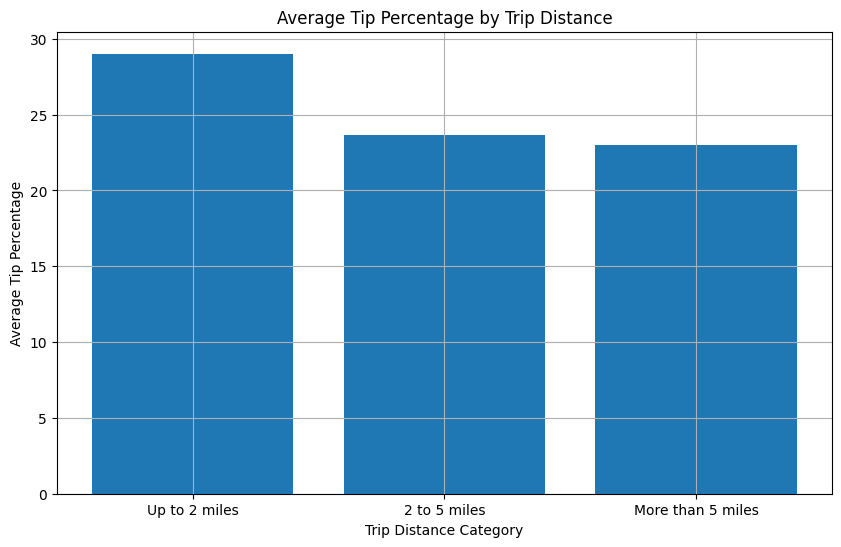

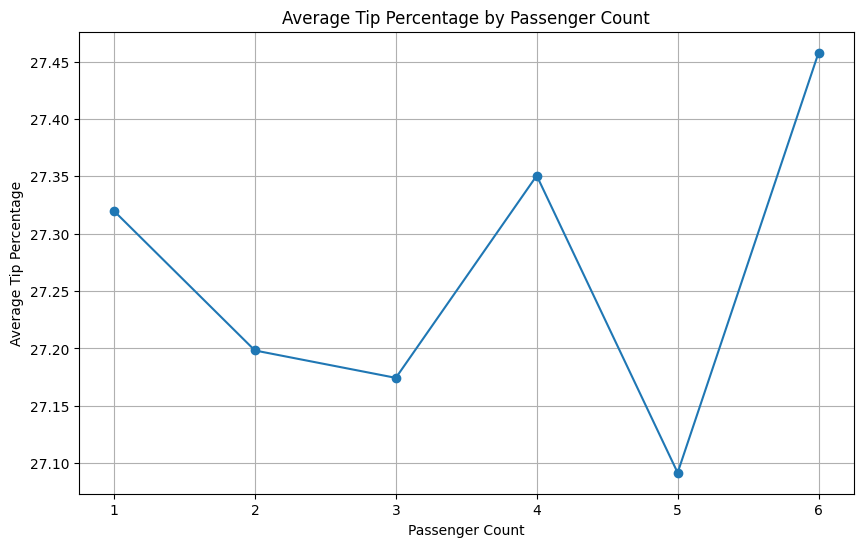

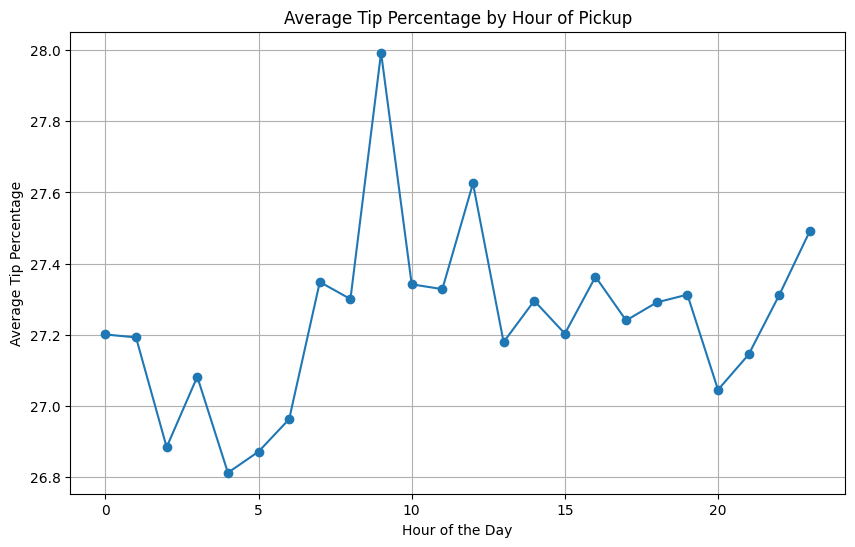

                 trip_distance  passenger_count  hour_of_day  tip_percentage
trip_distance         1.000000         0.005380    -0.001741       -0.171672
passenger_count       0.005380         1.000000     0.003146       -0.001878
hour_of_day          -0.001741         0.003146     1.000000       -0.000533
tip_percentage       -0.171672        -0.001878    -0.000533        1.000000


In [167]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
mergedData['tip_percentage'] = (mergedData['tip_amount'] / mergedData['fare_amount']) * 100

# 1. Analyze tip percentage by trip distance
# Categorizing trip distances
conditions = [
    (mergedData['trip_distance'] <= 2),  # Up to 2 miles
    (mergedData['trip_distance'] > 2) & (mergedData['trip_distance'] <= 5),  # Between 2 and 5 miles
    (mergedData['trip_distance'] > 5)  # More than 5 miles
]

labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
mergedData['distance_category'] = pd.cut(mergedData['trip_distance'], bins=[0, 2, 5, float('inf')], labels=labels, right=True)

# Group by distance category and calculate average tip percentage
avgTipByDistance = mergedData.groupby('distance_category')['tip_percentage'].mean().reset_index()

# 2. Analyze tip percentage by passenger count
avgTipByPassengerCount = mergedData.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# 3. Analyze tip percentage by hour of pickup
avgTipByHour = mergedData.groupby('hour_of_day')['tip_percentage'].mean().reset_index()

# 4. Plot the results for analysis
# Plot tip percentage by distance category
plt.figure(figsize=(10, 6))
plt.bar(avgTipByDistance['distance_category'], avgTipByDistance['tip_percentage'])
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance Category')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# Plot tip percentage by passenger count
plt.figure(figsize=(10, 6))
plt.plot(avgTipByPassengerCount['passenger_count'], avgTipByPassengerCount['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# Plot tip percentage by hour of day
plt.figure(figsize=(10, 6))
plt.plot(avgTipByHour['hour_of_day'], avgTipByHour['tip_percentage'], marker='o')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# 5. Factors Leading to Low Tip Percentages
# We will look at correlations to see if there are any patterns

# Correlation between trip distance, passenger count, and tip percentage
correlation = mergedData[['trip_distance', 'passenger_count', 'hour_of_day','tip_percentage']].corr()
print(correlation)


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Group (tip percentage < 10%)
trip_distance       2.553843
fare_amount        16.172299
tip_amount          1.103819
passenger_count     1.369639
dtype: float64

High Tip Group (tip percentage > 25%)
trip_distance       1.621489
fare_amount        11.475602
tip_amount          3.575546
passenger_count     1.360490
dtype: float64


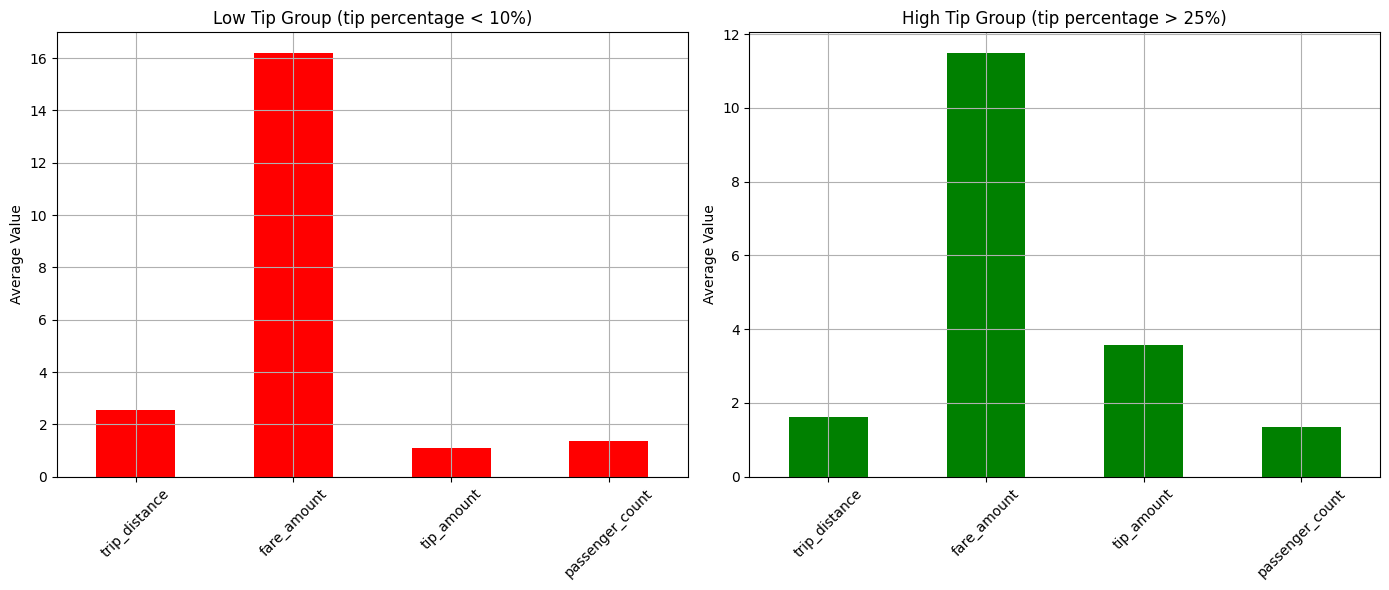

In [168]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
mergedData['tip_percentage'] = (mergedData['tip_amount'] / mergedData['fare_amount']) * 100

# Filter trips with tip percentage < 10% and tip percentage > 25%
lowTipDf = mergedData[mergedData['tip_percentage'] < 10]
highTipDf = mergedData[mergedData['tip_percentage'] > 25]

# Compare average statistics for both groups
lowTipStats = lowTipDf[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()
highTipStats = highTipDf[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()

# Print the statistics for comparison
print("Low Tip Group (tip percentage < 10%)")
print(lowTipStats)
print("\nHigh Tip Group (tip percentage > 25%)")
print(highTipStats)

# Visualize the comparison using bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for low tip group
lowTipStats.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Low Tip Group (tip percentage < 10%)')
axes[0].set_ylabel('Average Value')
axes[0].set_xticklabels(lowTipStats.index, rotation=45)
axes[0].grid(True)

# Plot for high tip group
highTipStats.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('High Tip Group (tip percentage > 25%)')
axes[1].set_ylabel('Average Value')
axes[1].set_xticklabels(highTipStats.index, rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

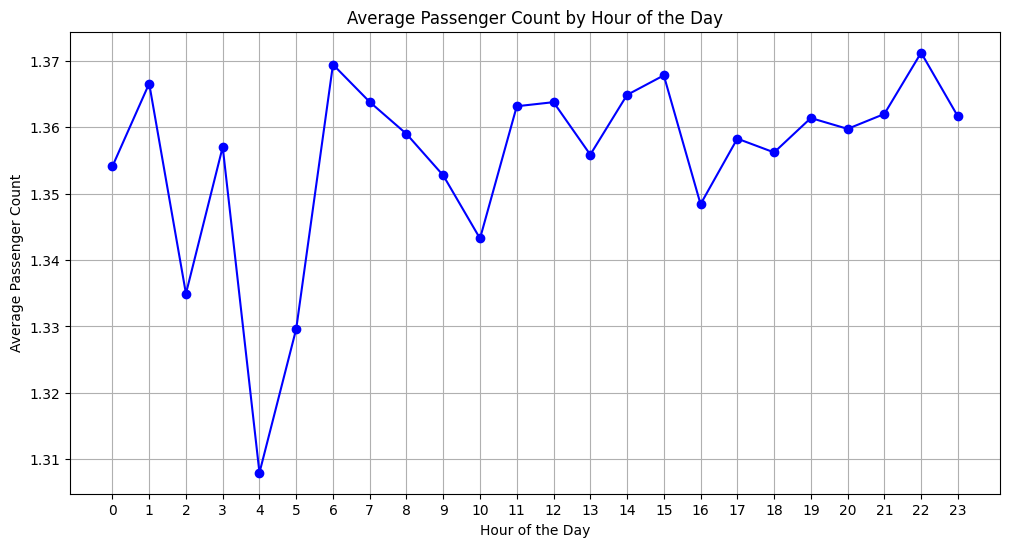

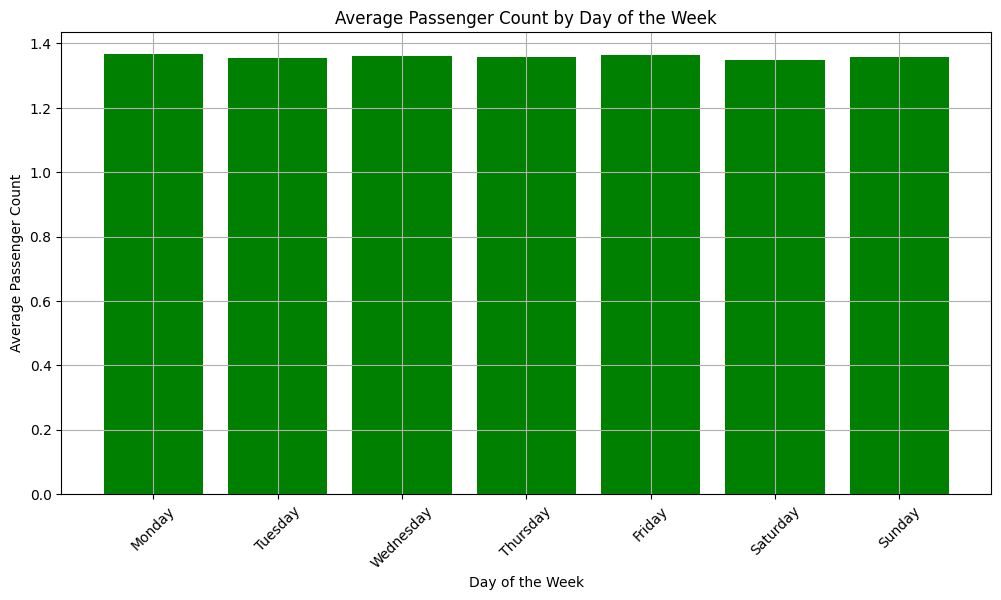

In [169]:
# See how passenger count varies across hours and days

avgPassengerCountByHour = mergedData.groupby('hour_of_day')['passenger_count'].mean().reset_index()

# Group by day of week and calculate the average passenger count
avgPassengerCountByDay = mergedData.groupby('day_of_week')['passenger_count'].mean().reset_index()

# Sort the days of the week for proper ordering
avgPassengerCountByDay = avgPassengerCountByDay.sort_values('day_of_week')
# Map the day of the week to a string 
avgPassengerCountByDay['day_of_week'] = avgPassengerCountByDay['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(12, 6))
plt.plot(avgPassengerCountByHour['hour_of_day'], avgPassengerCountByHour['passenger_count'], marker='o', color='blue')
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24, 1))  # Show every hour from 0 to 23
plt.show()

# Plot the variation of passenger count across days of the week
plt.figure(figsize=(12, 6))
plt.bar(avgPassengerCountByDay['day_of_week'], avgPassengerCountByDay['passenger_count'], color='green')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [170]:
# How does passenger count vary across zones

avgPassengerCountByPickupZone = mergedData.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Sort the pickup locations by average passenger count 
avgPassengerCountByPickupZone = avgPassengerCountByPickupZone.sort_values(by='passenger_count', ascending=False)
print("Pickup locations by average passenger count")
print(avgPassengerCountByPickupZone)

# Group by dropoff location and calculate average passenger count for each zone
avgPassengerCountByDropoffZone = mergedData.groupby('DOLocationID')['passenger_count'].mean().reset_index()

# Sort the dropoff locations by average passenger count 
avgPassengerCountByDropoffZone = avgPassengerCountByDropoffZone.sort_values(by='passenger_count', ascending=False)
print("\nDropoff locations by average passenger count")
print(avgPassengerCountByPickupZone)

Pickup locations by average passenger count
     PULocationID  passenger_count
60            124         4.000000
101           191         3.000000
2               6         3.000000
63            128         3.000000
42             82         2.833333
..            ...              ...
24             49         1.000000
39             76         1.000000
46             89         1.000000
92            173         1.000000
94            180         1.000000

[147 rows x 2 columns]

Dropoff locations by average passenger count
     PULocationID  passenger_count
60            124         4.000000
101           191         3.000000
2               6         3.000000
63            128         3.000000
42             82         2.833333
..            ...              ...
24             49         1.000000
39             76         1.000000
46             89         1.000000
92            173         1.000000
94            180         1.000000

[147 rows x 2 columns]


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

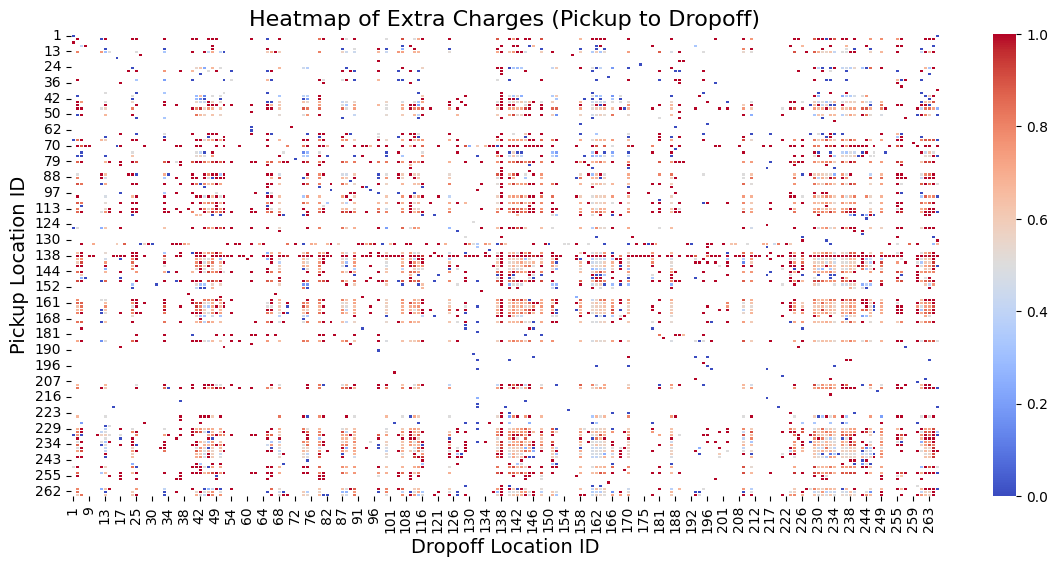

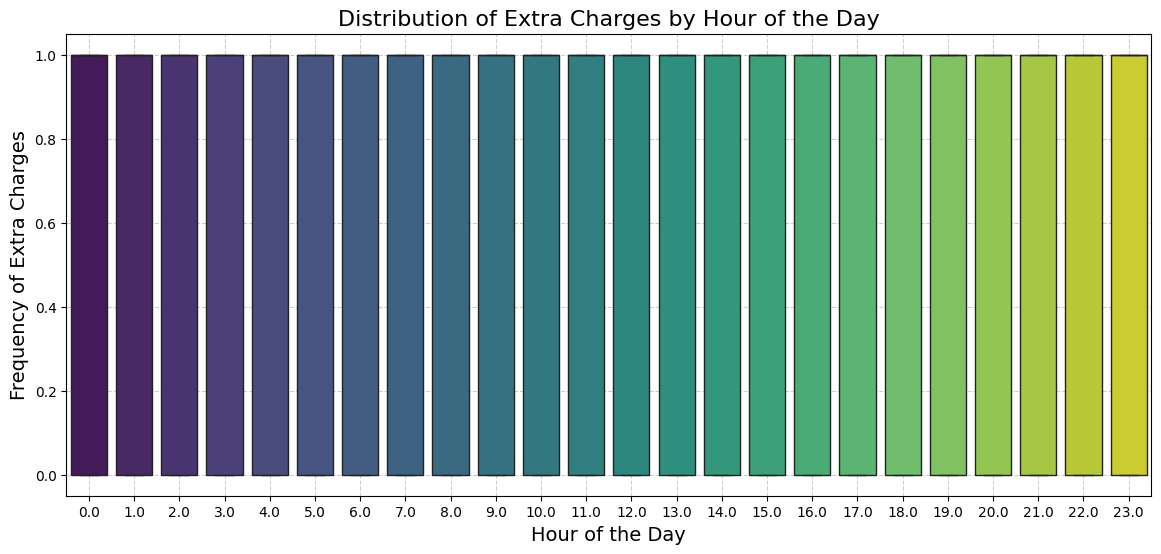

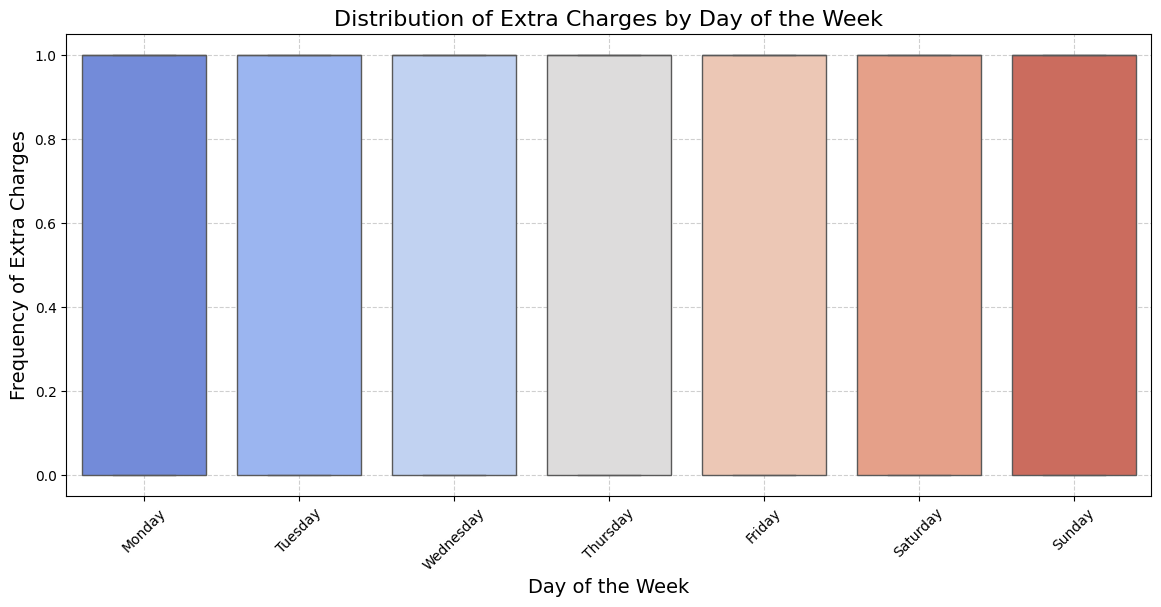

In [171]:
mergedData['extra_charge_applied'] = (mergedData['extra'] > 0)

### 1. Heatmap for Extra Charges by Pickup & Dropoff Locations ###
plt.figure(figsize=(14, 6))
pickupHeatmapData = mergedData.pivot_table(values='extra_charge_applied', index='PULocationID', columns='DOLocationID', aggfunc='mean')

sns.heatmap(pickupHeatmapData, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title("Heatmap of Extra Charges (Pickup to Dropoff)", fontsize=16)
plt.xlabel("Dropoff Location ID", fontsize=14)
plt.ylabel("Pickup Location ID", fontsize=14)
plt.show()


### 2. Box Plot for Extra Charges by Hour of the Day ###
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour_of_day', y='extra_charge_applied', data=mergedData, palette='viridis')
plt.title('Distribution of Extra Charges by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Frequency of Extra Charges', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24, 1))
plt.show()


### 3. Box Plot for Extra Charges by Day of the Week ###
mergedData['day_of_week'] = mergedData['tpep_pickup_datetime'].dt.strftime('%A')
daysOfWeekOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mergedData['day_of_week'] = pd.Categorical(mergedData['day_of_week'], categories=daysOfWeekOrder, ordered=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='day_of_week', y='extra_charge_applied', data=mergedData, palette='coolwarm')
plt.title('Distribution of Extra Charges by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Frequency of Extra Charges', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Route Optimization:

1. Increase taxi availability in high-demand areas during peak times to meet passenger needs efficiently.
2. Scale down taxi deployment in low-demand zones during off-peak hours to maximize resource efficiency.
3. Focus on dispatching taxis along high-demand routes to facilitate faster pickups and drop-offs.
4. Identify slower routes using average speed and peak-hour demand data. Combine this with real-time traffic insights to reroute taxis through faster alternatives.

Demand Management:

1. Weekday evenings, particularly between 5:00 PM and 7:00 PM, experience the highest demand. To address this, more taxis should be allocated during these hours. Likewise, weekends see a surge in demand from 11:00 PM to 5:00 AM, requiring strategic taxi deployment.

Enhancing Customer Experience:

1. Utilizing these insights can help minimize passenger wait times, especially during peak hours, improving customer satisfaction and potentially leading to higher driver tips.
2. Introducing discounts for off-peak hours and low-demand areas can incentivize more rides, leading to better trip utilization and increased overall efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Cab Positioning Based on Trip Trends
Analyzing trip patterns across different times, days, and months, the following recommendations can help optimize cab distribution across various zones:

Peak Hour Deployment: Increase the number of cabs in high-demand areas, particularly during peak hours. Key locations include Midtown Center, Upper East Side South, Upper East Side North, Midtown East, JFK Airport, LaGuardia Airport, Lincoln Square East, Penn Station/Madison Square West, Times Square/Theatre District, and Murray Hill.

Nighttime Coverage: Ensure adequate cab availability in areas with higher late-night activity, such as the East Village, West Village, Lower East Side, Clinton East, Greenwich Village, and JFK Airport.

Weekday vs. Weekend Demand: Weekday evenings tend to be busier, requiring additional cabs in business hubs and residential areas. On weekends, demand surges during the evening and late-night hours, making it crucial to position more cabs near shopping centers, entertainment districts, and tourist hotspots.

Seasonal Demand Adjustments: Demand spikes during the summer months (May to June) and the holiday season (October to December). Deploying extra cabs tailored for these high-demand periods will help accommodate increased ride requests.

Smart Allocation Strategies: By integrating real-time traffic data, time-of-day patterns, and passenger preferences, a dynamic system can be developed to optimize cab distribution. This will help minimize wait times and reduce travel distances, improving overall efficiency

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Dynamic Pricing Implementation: Adjust fares based on demand fluctuations. Increase rates during peak hours (5:00–7:00 PM) and late-night periods (8:00 PM–6:00 AM) to maximize revenue while also considering pricing strategies for moderate-demand and high-mobility zones.

Off-Peak Promotions: Introduce discounts or special offers during low-demand hours to boost ridership and enhance overall utilization.

Tiered Fare Adjustments: Modify pricing structures for different trip lengths. Maintain competitive pricing for mid-range trips (2–5 miles) to attract more passengers, while considering fare adjustments for medium (2–5 miles) and long-distance trips (over 5 miles) to optimize revenue.

Competitive Pricing Strategies: Verifone INC can explore more attractive pricing models in comparison to Creative Mobile Technologies to gain an edge in the market.

Market-Driven Adjustments: Regularly track competitor pricing trends and fine-tune rates to balance competitiveness and profitability.

Loyalty Incentives: Implement rewards programs or perks for frequent riders to foster repeat business and strengthen customer retention.